## Mooney Viscoelasticity Dataset Analysis v2
Data: 02/22/25
Author: Peter Y Xie
Class: STEMREM 205A
Teacher: Aaron Newman
TAs: Rachel Glyzer, Suzie Avagayan

## Import Packages

In [2]:
import numpy as np
import scanpy as sc
import anndata as ad
import scipy.io
import gzip
# Data retrieval
import pooch
import pandas as pd
import os
import scipy.sparse as sp
from anndata import AnnData
import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib.pyplot import rc_context
import seaborn as sns
from scipy.stats import gaussian_kde
from scipy.stats import ttest_ind
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.multitest import multipletests
import skimage
import scvi
import torch
from rich import print
# from scib_metrics.benchmark import Benchmarker


/home/pyxie/miniconda3/envs/custom_jupyter_env/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/pyxie/miniconda3/envs/custom_jupyter_env/lib/python3.12/site-packages/docrep/decorators.py:43: SyntaxWarning: 'param_categorical_covariate_keys' is not a valid key!
  doc = func(self, args[0].__doc__, *args[1:], **kwargs)
/home/pyxie/miniconda3/envs/custom_jupyter_env/lib/python3.12/site-packages/docrep/decorators.py:43: SyntaxWarning: 'param_continuous_covariate_keys' is not a valid key!
  doc = func(self, args[0].__doc__, *args[1:], **kwargs)


In [3]:
# Define the directory where figures will be saved
fig_dir = "/labs/delitto/peter/Mooney_viscoelasticity_dataset/figures"
os.makedirs(fig_dir, exist_ok=True)  # Create folder if it doesn't exist
# Define the directory where figures will be saved
output_dir = "/labs/delitto/peter/Mooney_viscoelasticity_dataset/results"
os.makedirs(output_dir, exist_ok=True)  # Create folder if it doesn't exist


## Load All datasets

1. 3D Dataset - Collagen crosslinked D3
2. 3D Dataset - Collagen non-crosslinked D3
3. 3D Dataset - D0
4. 2D Dataset - D3

In [ ]:
# setup
# lets set the default figure settings
sc.settings.set_figure_params(dpi_save=300, dpi=100)
sc.settings.figdir = fig_dir

# A. Day 3 NON-Crosslinked 3D Collagen

matrix_file_name_d3_collagen_nc = "/labs/delitto/peter/Mooney_viscoelasticity_dataset/data/GSM7230112_NonCrosslinked_Collagen_D3_matrix.mtx.gz"
barcodes_file_name_d3_collagen_nc = "/labs/delitto/peter/Mooney_viscoelasticity_dataset/data/GSM7230112_NonCrosslinked_Collagen_D3_barcodes.tsv.gz"
features_file_name_d3_collagen_nc = "/labs/delitto/peter/Mooney_viscoelasticity_dataset/data/GSM7230112_NonCrosslinked_Collagen_D3_features.tsv.gz"

with gzip.open(matrix_file_name_d3_collagen_nc, "rb") as f:
    sparse_matrix_nc = scipy.io.mmread(f)
    
dense_matrix_nc = sparse_matrix_nc.toarray()
print('3D Collagen-NONcrosslinked Day 3: \n')
print(dense_matrix_nc.shape)
print(dense_matrix_nc[3,5])

# Load barcodes (cell identifiers)
barcodes_nc = pd.read_csv(barcodes_file_name_d3_collagen_nc, sep="\t", header=None)
barcodes_nc.columns = ["Barcode"]  # Name the column for clarity

print(barcodes_nc.head())

new_file_path = features_file_name_d3_collagen_nc
features_nc = pd.read_csv(features_file_name_d3_collagen_nc, sep='\t', header=None)
# features.columns = ["Gene_ID", "Gene_Name", "Feature_Type"]
print(features_nc.head())
print(len(features_nc))

# Day 3 Crosslinked 3D Collagen

matrix_file_name_d3_collagen_c = "/labs/delitto/peter/Mooney_viscoelasticity_dataset/data/GSM7230113_Crosslinked_Collagen_D3_matrix.mtx.gz"
barcodes_file_name_d3_collagen_c = "/labs/delitto/peter/Mooney_viscoelasticity_dataset/data/GSM7230113_Crosslinked_Collagen_D3_barcodes.tsv.gz"
features_file_name_d3_collagen_c = "/labs/delitto/peter/Mooney_viscoelasticity_dataset/data/GSM7230113_Crosslinked_Collagen_D3_features.tsv.gz"

with gzip.open(matrix_file_name_d3_collagen_c, "rb") as f:
    sparse_matrix_c = scipy.io.mmread(f)
    
dense_matrix_cc = sparse_matrix_c.toarray()
print('3D Collagen-crosslinked Day 3:')
print(dense_matrix_cc.shape)
print(dense_matrix_cc[3,5])

# Load barcodes (cell identifiers)
barcodes_cc = pd.read_csv(barcodes_file_name_d3_collagen_c, sep="\t", header=None)
barcodes_cc.columns = ["Barcode"]  # Name the column for clarity

print(barcodes_cc.head())

new_file_path = features_file_name_d3_collagen_c
features_cc = pd.read_csv(features_file_name_d3_collagen_c, sep='\t', header=None)
# features.columns = ["Gene_ID", "Gene_Name", "Feature_Type"]
print(features_cc.head())

# Day 0 Crosslinked 3D Collagen
matrix_file_name_d0_control = "/labs/delitto/peter/Mooney_viscoelasticity_dataset/data/GSM7230111_D0_Control_matrix.mtx.gz"
barcodes_file_name_d0_control = "/labs/delitto/peter/Mooney_viscoelasticity_dataset/data/GSM7230111_D0_Control_barcodes.tsv.gz"
features_file_name_d0_control = "/labs/delitto/peter/Mooney_viscoelasticity_dataset/data/GSM7230111_D0_Control_features.tsv.gz"

with gzip.open(matrix_file_name_d0_control, "rb") as f:
    sparse_matrix_d0 = scipy.io.mmread(f)
    
dense_matrix_d0 = sparse_matrix_d0.toarray()
print('Day 0 Control Collagen')
print(dense_matrix_d0.shape)
print(dense_matrix_d0[3,5])

# Load barcodes (cell identifiers)
barcodes_d0 = pd.read_csv(barcodes_file_name_d0_control, sep="\t", header=None)
barcodes_d0.columns = ["Barcode"]  # Name the column for clarity

print(barcodes_d0.head())

new_file_path = features_file_name_d0_control 
features_d0 = pd.read_csv(features_file_name_d3_collagen_c, sep='\t', header=None)
# features.columns = ["Gene_ID", "Gene_Name", "Feature_Type"]
print(features_d0.head())

# Day 3 2D Glass Plate Control

matrix_file_name_d3_2D = "/labs/delitto/peter/Mooney_viscoelasticity_dataset/data/GSM7230114_2D_Control_D3_matrix.mtx.gz"
barcodes_file_name_d3_2D = "/labs/delitto/peter/Mooney_viscoelasticity_dataset/data/GSM7230114_2D_Control_D3_barcodes.tsv.gz"
features_file_name_d3_2D = "/labs/delitto/peter/Mooney_viscoelasticity_dataset/data/GSM7230114_2D_Control_D3_features.tsv.gz"

with gzip.open(matrix_file_name_d3_2D, "rb") as f:
    sparse_matrix_2D = scipy.io.mmread(f)
    
dense_matrix_2D = sparse_matrix_2D.toarray()
print('Day 3 2D Plate')
print(dense_matrix_2D.shape)
print(dense_matrix_2D[3,5])

# Load barcodes (cell identifiers)
barcodes_2D = pd.read_csv(barcodes_file_name_d3_2D, sep="\t", header=None)
barcodes_2D.columns = ["Barcode"]  # Name the column for clarity
print(barcodes_2D.head())
print(len(barcodes_2D))
new_file_path = features_file_name_d3_2D 
features_2D = pd.read_csv(features_file_name_d3_collagen_c, sep='\t', header=None)
# features.columns = ["Gene_ID", "Gene_Name", "Feature_Type"]
print(features_2D.head())





## Step 2: Quality Control (QC)

In [ ]:
def Quality_control_on_object(dense_matrix, barcodes_matrix, features_matrix):
    adata = ad.AnnData(X=dense_matrix.transpose())
    print(f"Dense matrix shape: {dense_matrix.shape}") 
    print(f"Number of barcodes: {barcodes_matrix.shape[0]}")  # Should be num_cells
    print(f"Number of features: {features_matrix.shape[0]}")  # Should be num_genes  
    # Add barcodes to AnnData object
    adata.obs['barcodes'] = barcodes_matrix['Barcode'].values
    # Add gene names to AnnData object
    adata.var['features'] = features_matrix[1].values
    # Check the AnnData object
    print(adata)
    # Annotate the number of genes expressed in each cell
    adata.obs['n_genes'] = (adata.X > 0).sum(axis=1)
    # Annotate the total counts per cell
    adata.obs['total_counts'] = adata.X.sum(axis=1)
    # Annotate the percentage of counts coming from mitochondrial genes
    # Assuming your feature names are in format of "MT-"
    mito_genes = adata.var['features'].str.startswith('MT')
    adata.obs['percent_mito'] = np.sum(adata[:, mito_genes].X, axis=1) / np.sum(adata.X, axis=1)
    # Print the summary statistics for these QC metrics
    print(adata.obs[['n_genes', 'total_counts', 'percent_mito']].head())
    adata.obs.head()
    # Filter out cells with low numbers of genes or high mitochondrial gene expression
    adata = adata[adata.obs['n_genes'] > 1000,]
    adata = adata[adata.obs['total_counts']  > 2000]
    # Filter out genes that are expressed in very few cells
    sc.pp.filter_genes(adata, min_counts=3)
    # Filter out high mitochondrial counts
    adata = adata[adata.obs.percent_mito < 0.2,]
    # Filter out high mitochondrial counts
    # adata = adata[adata.obs.percent_mito < 10,]
    # Check the shape after filtering
    print(adata)
    sc.pp.scrublet(adata)  
    # QC plots after filtering
    sc.pl.violin(adata, ['n_genes', 'total_counts', 'percent_mito'], jitter=0.8, multi_panel=True)
    # Show distribution as histograms for better insight
    # Set QC thresholds
    min_genes = 1000
    min_counts = 2000
    max_mito = 0.2  # 20%
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    adata.obs['n_genes'].hist(bins=60, ax=axes[0], color='skyblue')
    axes[0].axvline(min_genes, color='red', linestyle='dashed', label=f'Threshold: {min_genes}')
    adata.obs['total_counts'].hist(bins=60, ax=axes[1], color='skyblue')
    axes[1].axvline(min_counts, color='red', linestyle='dashed', label=f'Threshold: {min_counts}')
    adata.obs['percent_mito'].hist(bins=60, ax=axes[2], color='skyblue')
    axes[2].axvline(max_mito, color='red', linestyle='dashed', label=f'Threshold: {max_mito}')
    for ax, metric in zip(axes, ['n_genes', 'total_counts', 'percent_mito']):
        ax.set_title(metric)
        plt.tight_layout()
        plt.show()
    # Print the names of the first 100 features (genes)
    print(adata.var['features'].head(100))
    if 'features' in adata.var.columns:
        adata.var_names = adata.var['features']
    return adata

# A. Day 3 NON-Crosslinked 3D Collagen

adata_d3_nc = Quality_control_on_object(dense_matrix_nc, barcodes_nc, features_nc)
adata_d3_cc = Quality_control_on_object(dense_matrix_cc, barcodes_cc, features_cc)
# adata_d0_c = Quality_control_on_object(dense_matrix_d0, barcodes_d0, features_d0)
adata_2D = Quality_control_on_object(dense_matrix_2D, barcodes_2D, features_2D)

### 2. Normalize the data and lognorm
By default, we employ a global-scaling normalization method that turns counts into log(CPM+1). Counts per million normalizes for sequencing depth (for scRNA the default is counts per 10,000), and natural log normalization is used to adjust the data distribution to be semi-normal.

In [ ]:
def normalization_and_lognorm(adata):
    sc.pp.normalize_total(adata) # counts per million normalizes for the sequencing depth, natural log normalization is used to adjust the data distribution to be semi-normal
    sc.pp.log1p(adata)

    adata.raw = adata

    # identify variable genes
    sc.pp.highly_variable_genes(adata)
    adata

    # view top 10
    adata.var.loc[adata.var.highly_variable].sort_values("dispersions", ascending=False).head(10)
    adata.var.rename(columns={'features': 'gene_symbols'}, inplace=True)
    print(adata.var.head())

    # plot variablility distribution
    sc.pl.highly_variable_genes(adata)
    
    # Verify uniqueness
    print(f"Is adata.var_names unique? {adata.var_names.is_unique}")
    print(f"Is adata.raw.var_names unique? {adata.raw.var_names.is_unique}")

    duplicates = pd.Series(adata.raw.var_names)[pd.Series(adata.raw.var_names).duplicated()]
    print(f"Number of duplicated items in adata.raw.var_names: {len(duplicates)}")
    if len(duplicates) > 0:
        print("Duplicated items:")
        print(duplicates)
    else:
        print("No duplicated items found in adata.raw.var_names.")

    # Ensure unique var_names in the main adata object
        # Convert var_names to string type if they are categorical
    if pd.api.types.is_categorical_dtype(adata.raw.var_names):
        adata.var_names = adata.var_names.astype(str)
    adata.var_names_make_unique()
    adata.raw = adata

    return adata

adata_d3_nc.layers["counts"] = adata_d3_nc.X.copy()
adata_d3_cc.layers["counts"] = adata_d3_cc.X.copy()
adata_2D.layers["counts"] = adata_2D.X.copy()

adata_d3_nc = normalization_and_lognorm(adata_d3_nc)
adata_d3_cc = normalization_and_lognorm(adata_d3_cc)
# adata_d0_c = normalization_and_lognorm(adata_d0_c)
adata_2D = normalization_and_lognorm(adata_2D)

In [7]:
adata_d3_nc.obs['batch'] = 'Batch_nc'
adata_d3_cc.obs['batch'] = 'Batch_cc'
# adata_d0_c.obs['batch'] = 'Batch_d0'
adata_2D.obs['batch'] = 'Batch_2d'


In [8]:
tcelldata = sc.concat(
    [adata_d3_nc, adata_d3_cc, adata_2D], 
    label="batch",  # Preserve batch labels
    keys=["Batch_nc", "Batch_cc", "Batch_2d"]
)

    #keys=["Batch_nc", "Batch_cc", "Batch_d0", "Batch_2d"]
print(tcelldata.obs['batch'].value_counts())
# tcelldata.layers["counts"] = tcelldata.X.copy()  # Preserve original raw counts




/home/pyxie/miniconda3/envs/custom_jupyter_env/lib/python3.12/site-packages/anndata/_core/anndata.py:1756: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/home/pyxie/miniconda3/envs/custom_jupyter_env/lib/python3.12/site-packages/anndata/_core/anndata.py:1756: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


batch
Batch_nc    5014
Batch_2d    4468
Batch_cc    3441
Name: count, dtype: int64

In [9]:
tcelldata.layers["counts"]

array([[0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 2, 0, 0],
       [0, 0, 1, ..., 0, 0, 0]])

In [10]:
scvi.model.SCVI.setup_anndata(tcelldata, layer="counts", batch_key="batch")

In [11]:
# Train the model with fewer epochs
model = scvi.model.SCVI(tcelldata, n_layers=2, n_latent=30, gene_likelihood="nb")

In [13]:
model.train(max_epochs=200)  # Try 100-200 instead of default (500)

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
SLURM auto-requeueing enabled. Setting signal handlers.
/home/pyxie/miniconda3/envs/custom_jupyter_env/lib/python3.12/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:425: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=7` in the `DataLoader` to improve performance.


Epoch 200/200: 100%|██████████| 200/200 [26:49<00:00,  8.57s/it, v_num=1, train_loss_step=1.29e+4, train_loss_epoch=1.3e+4]

`Trainer.fit` stopped: `max_epochs=200` reached.


Epoch 200/200: 100%|██████████| 200/200 [26:49<00:00,  8.05s/it, v_num=1, train_loss_step=1.29e+4, train_loss_epoch=1.3e+4]


In [ ]:
from datetime import datetime

save_dir = "/labs/delitto/peter/Mooney_viscoelasticity_dataset/"
# Generate a timestamp in "YYYYMMDD_HHMMSS" format
timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
# Define full file path
file_path = os.path.join(save_dir, f"checkpoint_{timestamp}.h5ad")


tcelldata.write_h5ad(file_path)
print(f"Checkpoint saved as checkpoint_{timestamp}.h5ad")


In [ ]:
### Begin from here
# load_dir = "/labs/delitto/peter/Mooney_viscoelasticity_dataset/"
# tcelldata = sc.read_h5ad("/labs/delitto/peter/Mooney_viscoelasticity_dataset/checkpoint_20250308_193404.h5ad")

In [14]:
tcelldata.obs_names_make_unique()

In [15]:
tcelldata

AnnData object with n_obs × n_vars = 12923 × 17882
    obs: 'barcodes', 'n_genes', 'total_counts', 'percent_mito', 'doublet_score', 'predicted_doublet', 'batch', '_scvi_batch', '_scvi_labels'
    uns: '_scvi_uuid', '_scvi_manager_uuid'
    layers: 'counts'

In [16]:
SCVI_LATENT_KEY = "X_scVI"
tcelldata.obsm[SCVI_LATENT_KEY] = model.get_latent_representation()

In [17]:
sc.pp.neighbors(tcelldata, use_rep=SCVI_LATENT_KEY, n_pcs=30, n_neighbors=15)

/local/scratch/pyxie/slrmtmp.47760608/ipykernel_6159/2681922593.py:3: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(tcelldata,  resolution=0.15)


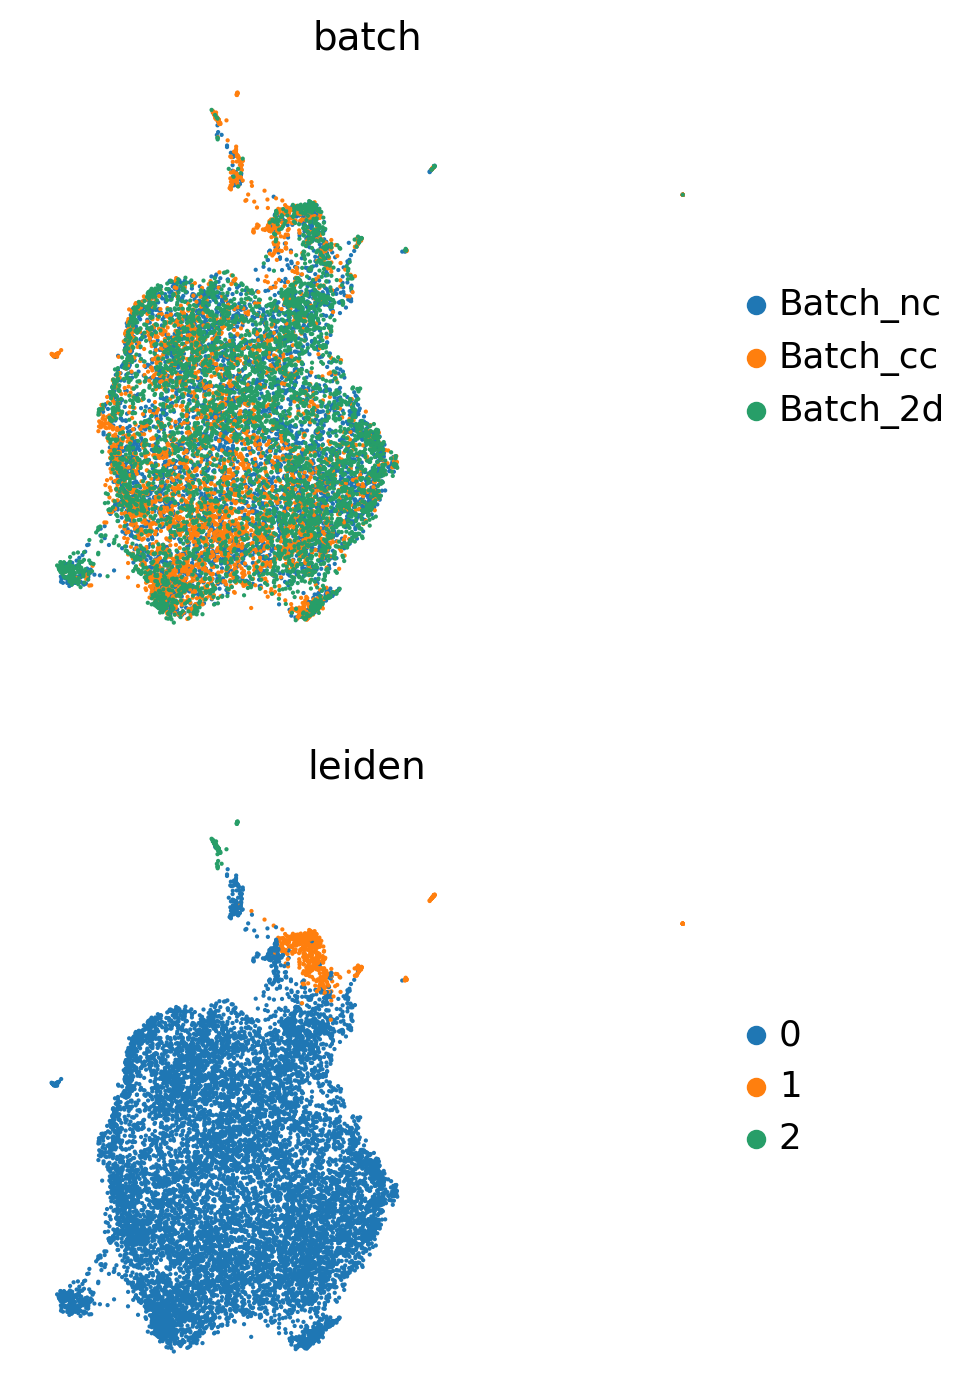

In [18]:
# Compute nearest neighbors graph 
sc.tl.umap(tcelldata, min_dist=0.01)
sc.tl.leiden(tcelldata,  resolution=0.15)
sc.pl.umap(
    tcelldata,
    color=["batch", "leiden"],
    frameon=False,
    ncols=1,
    save="_batch_umap.png"
)

In [19]:
# run combat
# sc.pp.combat(tcelldata, key='batch')

# regular steps
# sc.pp.highly_variable_genes(tcelldata)
# sc.pl.highly_variable_genes(tcelldata)

# sc.pp.scale(tcelldata, max_value=10)
# sc.pp.pca(tcelldata, n_comps=50, use_highly_variable=True, svd_solver='arpack')
# sc.pl.pca_variance_ratio(tcelldata, n_pcs=20)


In [20]:
# sc.pp.neighbors(tcelldata, n_pcs=20)
# # Perform Leiden clustering
# sc.tl.leiden(tcelldata, resolution=0.5)  # Adjust resolution for more or fewer clusters
# sc.tl.umap(tcelldata)
# # plot UMAP
# print(tcelldata.obs.columns)  # Ensure 'batch' exists
# print(tcelldata.obs['batch'].unique())  # Check batch values

# fig = sc.pl.umap(tcelldata, color=['leiden'], legend_loc="on data")
# sc.pl.umap(tcelldata, color="batch", title="SCVI umap")
# sc.pl.umap(tcelldata, color="leiden", title="SCVI umap",
#            legend_fontsize=6, legend_loc="on data")

tcelldata

AnnData object with n_obs × n_vars = 12923 × 17882
    obs: 'barcodes', 'n_genes', 'total_counts', 'percent_mito', 'doublet_score', 'predicted_doublet', 'batch', '_scvi_batch', '_scvi_labels', 'leiden'
    uns: '_scvi_uuid', '_scvi_manager_uuid', 'neighbors', 'umap', 'leiden', 'batch_colors', 'leiden_colors'
    obsm: 'X_scVI', 'X_umap'
    layers: 'counts'
    obsp: 'distances', 'connectivities'

AnnData object with n_obs × n_vars = 12197 × 17882
    obs: 'barcodes', 'n_genes', 'total_counts', 'percent_mito', 'doublet_score', 'predicted_doublet', 'batch', 
'_scvi_batch', '_scvi_labels', 'leiden'
    uns: '_scvi_uuid', '_scvi_manager_uuid', 'neighbors', 'umap', 'leiden', 'batch_colors', 'leiden_colors'
    obsm: 'X_scVI', 'X_umap'
    layers: 'counts'
    obsp: 'distances', 'connectivities'

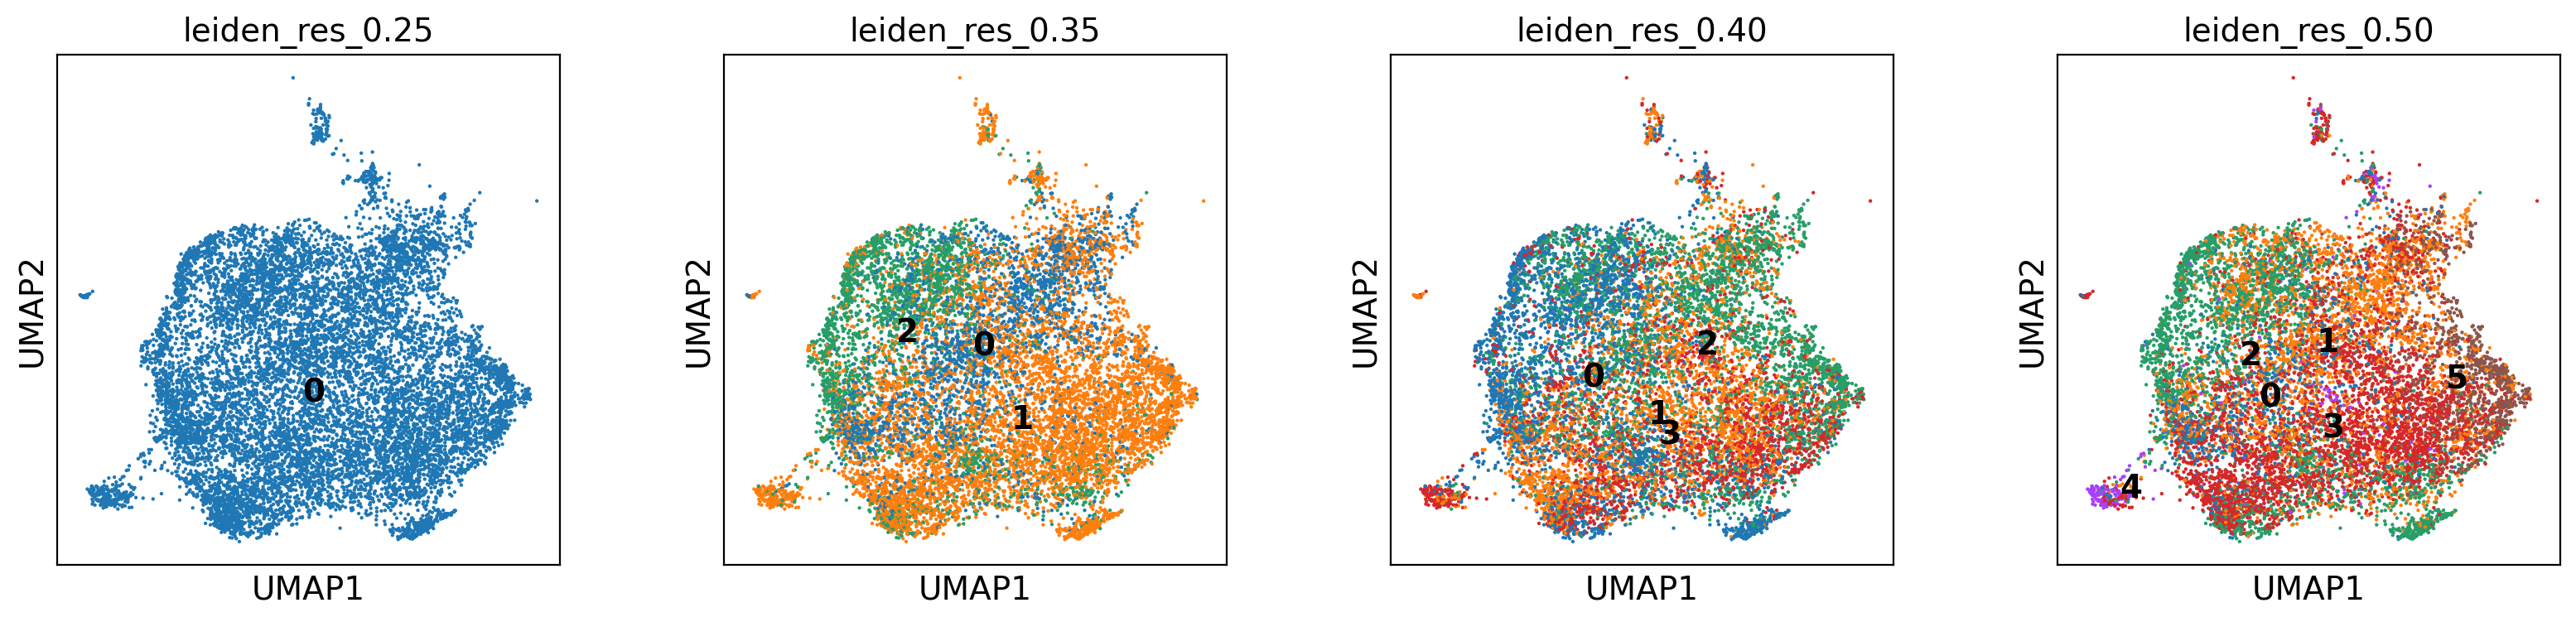

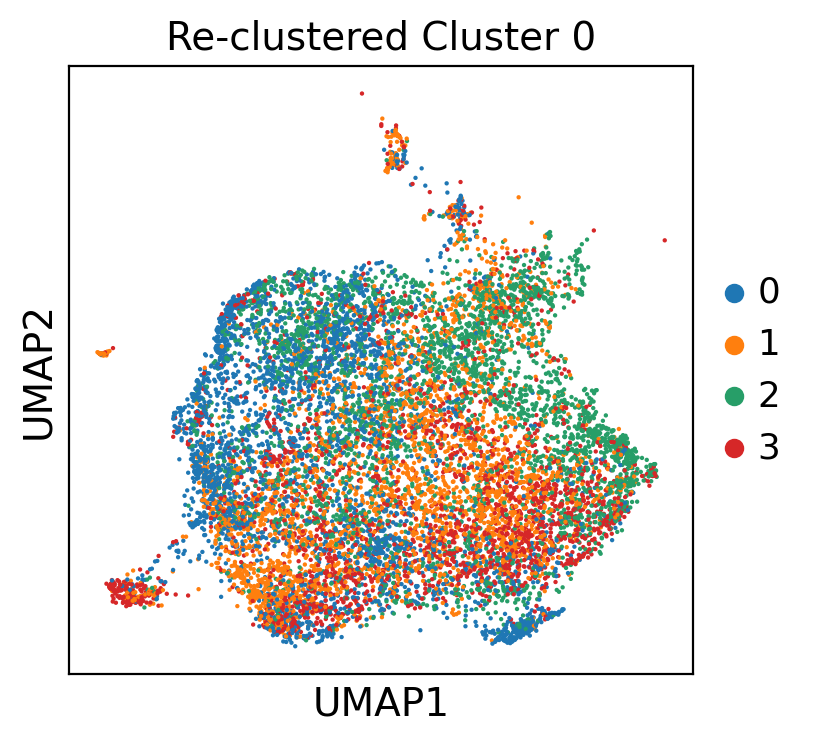

In [21]:
# Subcluster
# Step 1: Select the cluster you want to re-cluster
tcelldata.obs_names_make_unique()  # Ensures all cells have unique names
target_cluster = "0"  # Change this to the cluster number of interest
adata_sub = tcelldata[tcelldata.obs['leiden'] == target_cluster].copy()  # Subset the data
print(adata_sub)

# Convert NaNs to zeros before log transformation
adata_sub.X = np.nan_to_num(adata_sub.X)
adata_sub.X[adata_sub.X < 0] = 0
# Compute total counts per cell
# If sparse, sum efficiently
if scipy.sparse.issparse(adata_sub.X):
    adata_sub.obs["total_counts"] = np.array(adata_sub.X.sum(axis=1)).flatten()
else:
    adata_sub.obs["total_counts"] = adata_sub.X.sum(axis=1)

# Step 4: Compute total counts per cell
adata_sub.obs["total_counts"] = np.ravel(adata_sub.X.sum(axis=1))  # More efficient flattening

# Step 5: Remove cells with zero total counts
adata_sub = adata_sub[adata_sub.obs["total_counts"] > 0, :].copy()

# sc.pp.normalize_total(adata_sub)
# sc.pp.log1p(adata_sub)
# Continue with scaling and PCA
# sc.pp.scale(adata_sub, max_value=10)
# sc.pp.pca(adata_sub, n_comps=20, svd_solver='arpack')

sc.pp.neighbors(adata_sub, use_rep=SCVI_LATENT_KEY, n_pcs=15, n_neighbors=15)

# playing with cluster resolution
for res in [0.25, 0.35, 0.4, 0.5]:
    sc.tl.leiden(
        adata_sub, key_added=f"leiden_res_{res:4.2f}", resolution=res, flavor="igraph"
    )

sc.pl.umap(
    adata_sub,
    color=["leiden_res_0.25", "leiden_res_0.35", "leiden_res_0.40", "leiden_res_0.50"],
    legend_loc="on data",
    save="leiden_res_play.png"
)

sc.pl.umap(adata_sub, color=['leiden_res_0.40'], title=f"Re-clustered Cluster {target_cluster}")


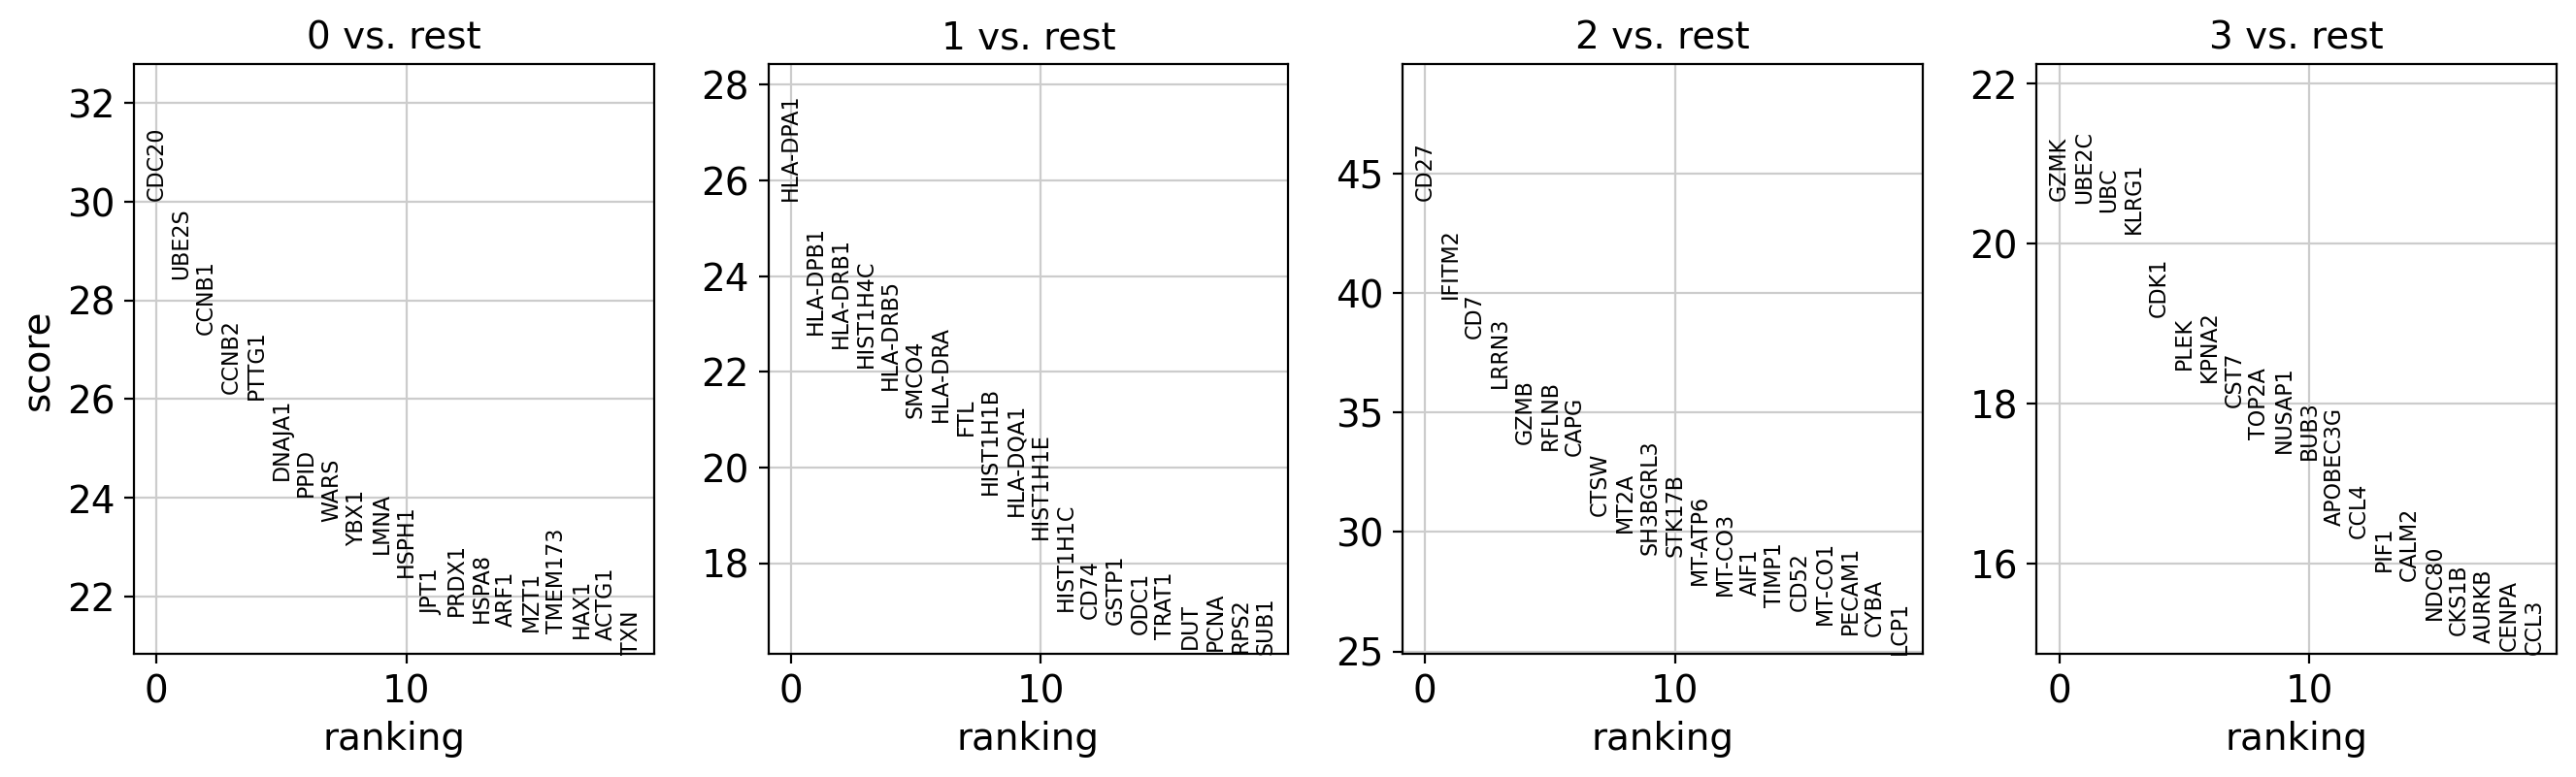

In [22]:
sc.tl.rank_genes_groups(adata_sub, groupby="leiden_res_0.40", method="wilcoxon")
sc.pl.rank_genes_groups(adata_sub, n_genes=20, sharey=False)


In [28]:
groups = adata_sub.uns["rank_genes_groups"]["names"].dtype.names 
top_genes_df_1 = sc.get.rank_genes_groups_df(adata_sub, group = groups[0]).head(10)
top_genes_df_2 = sc.get.rank_genes_groups_df(adata_sub, group = groups[1]).head(10)
top_genes_df_3 = sc.get.rank_genes_groups_df(adata_sub, group = groups[2]).head(10)
top_genes_df_4 = sc.get.rank_genes_groups_df(adata_sub, group = groups[3]).head(10)
# top_genes_df_5 = sc.get.rank_genes_groups_df(tcelladata_cd8, group = groups[4]).head(10)
# top_genes_df_6 = sc.get.rank_genes_groups_df(tcelladata_cd8, group = groups[5]).head(10)
# top_genes_df_7 = sc.get.rank_genes_groups_df(tcelladata_cd8, group = groups[6]).head(10)
# # Combine into one DataFrame
df_all = pd.concat([top_genes_df_1, top_genes_df_2, top_genes_df_3, top_genes_df_4], keys=groups)
print(df_all.head())
print(df_all.shape)


names     scores  logfoldchanges          pvals      pvals_adj
0 0  CDC20  30.020216        0.930618  5.346098e-198  1.365699e-194
  1  UBE2S  28.436384        0.590100  7.181181e-178  1.605173e-174
  2  CCNB1  27.310318        0.870356  3.198963e-164  5.200351e-161
  3  CCNB2  26.102621        0.764414  3.404327e-150  4.348298e-147
  4  PTTG1  25.991661        0.532834  6.152994e-149  7.335190e-146

(40, 5)

0  0     CDC20
   1     UBE2S
   2     CCNB1
   3     CCNB2
   4     PTTG1
   5    DNAJA1
   6      PPID
   7      WARS
   8      YBX1
   9      LMNA
Name: names, dtype: object

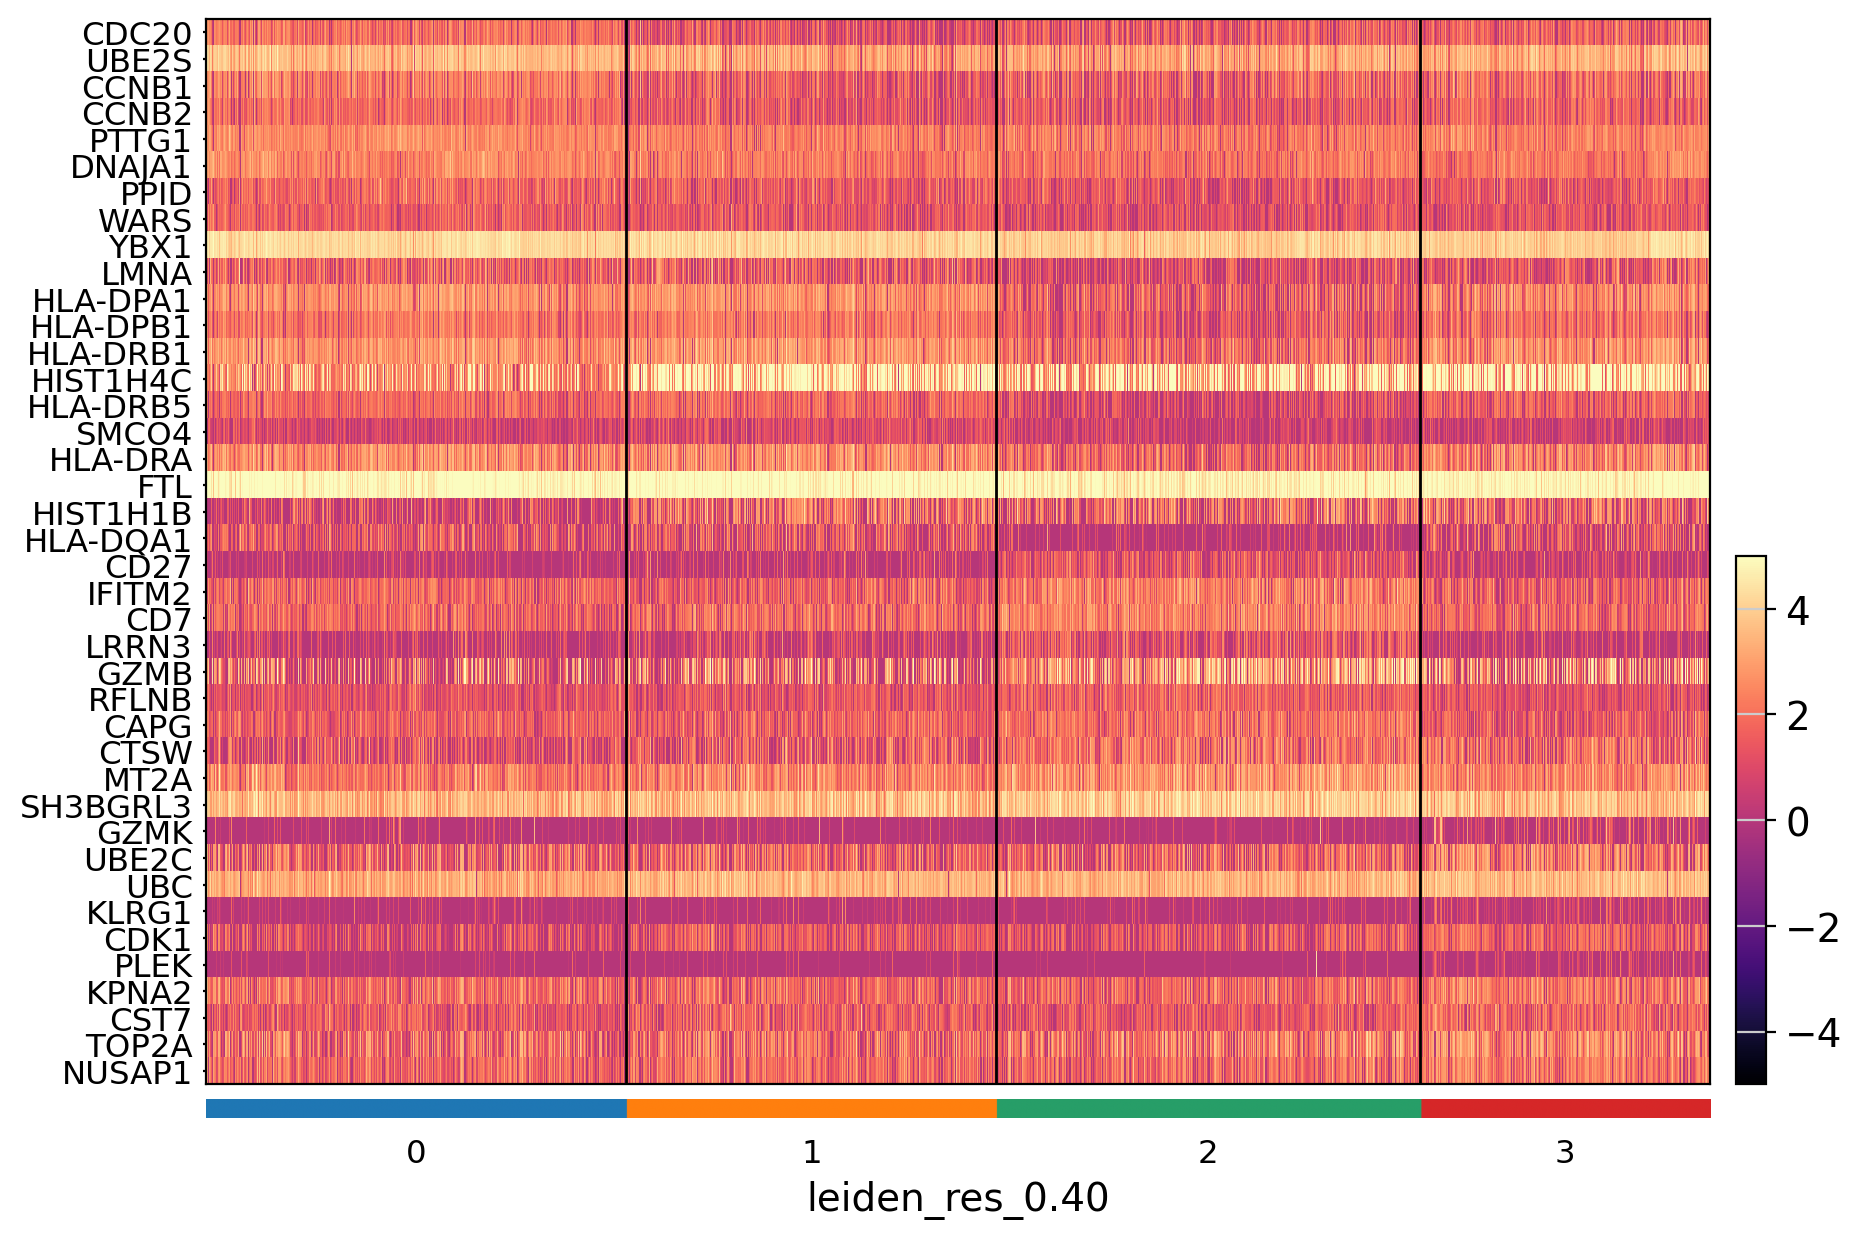

In [34]:
# Extract top genes as a list
top_genes_df = pd.DataFrame(df_all, columns=["names", "scores", "logfoldchanges", "pvals", "pvals_adj"])  # Adjust columns
top_genes_list = top_genes_df["names"]  # Convert column to a list
print(top_genes_list[:10])  # Verify the output
df_unique = top_genes_list.drop_duplicates()

sc.pl.heatmap(
    adata_sub, 
    var_names=df_unique,   # List of top marker genes
    groupby="leiden_res_0.40", # Group by cancer types
    cmap="magma",        # Change color scale if needed
    swap_axes=True,        # Display genes on Y-axis
    show=True,
    show_gene_labels = True,
    vmin=-5, vmax=5,  # Adjust for better contrast
)


In [23]:
# # playing with cluster resolution
# for res in [0.02, 0.05, 0.20, 0.50]:
#     sc.tl.leiden(
#         adata_sub, key_added=f"leiden_res_{res:4.2f}", resolution=res, flavor="igraph"
#     )

# sc.pl.umap(
#     adata_sub,
#     color=["leiden_res_0.02", "leiden_res_0.05", "leiden_res_0.20", "leiden_res_0.50"],
#     legend_loc="on data",
# )

In [24]:
# sc.tl.umap(adata_sub)
# sc.pl.umap(adata_sub, color=['leiden_res_0.35'], title=f"Re-clustered Cluster {target_cluster}")

# sc.tl.rank_genes_groups(adata_sub, groupby="leiden_res_0.35", method="wilcoxon")
# sc.pl.rank_genes_groups(adata_sub, n_genes=10, sharey=False)

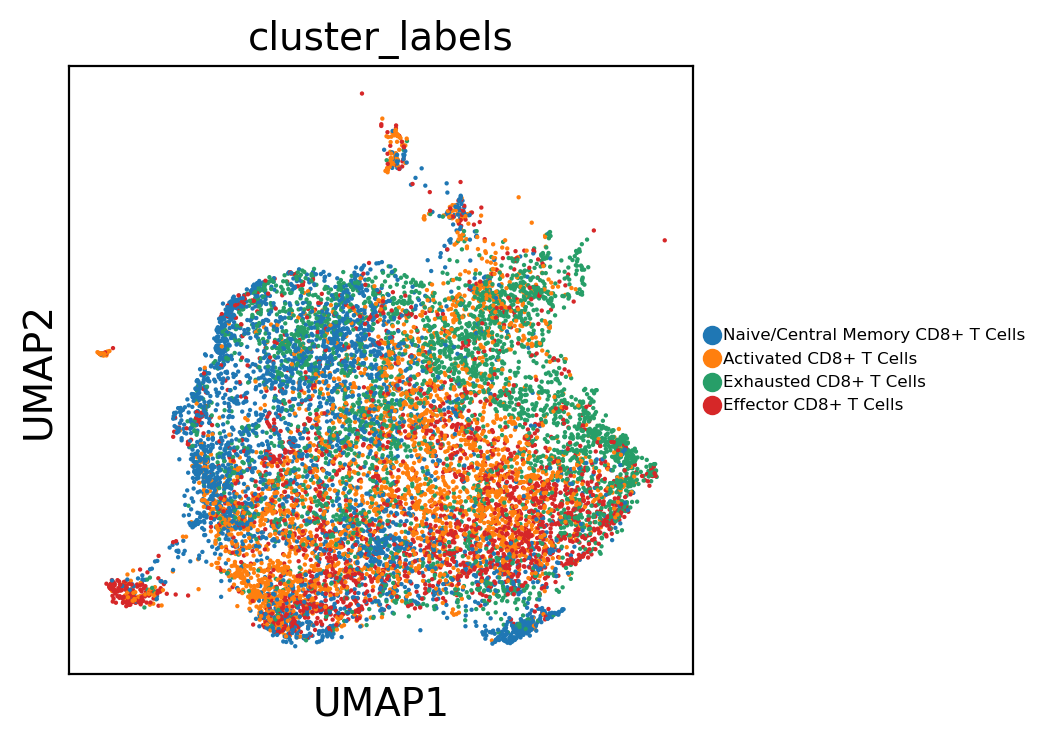

In [36]:
# Assuming 'adata' is your AnnData object and 'leiden' contains the cluster labels
cluster_labels = {
    '0': 'Naive/Central Memory CD8+ T Cells',
    '1': 'Activated CD8+ T Cells',
    '2': 'Exhausted CD8+ T Cells',
    '3': 'Effector CD8+ T Cells',
}

adata_sub.obs['cluster_labels'] = adata_sub.obs['leiden_res_0.40'].map(cluster_labels)

# plot umap with renamed clusters
sc.pl.umap(adata_sub, color=['cluster_labels'],
          legend_fontsize=6, save='clusters_labeled.png')

In [ ]:
# plot common marker genes for pbmc
print(tcelldata.obs.columns)
print(tcelldata.var.index[:10])  # Print the first 10 genes
tcelldata.var["gene_symbols"] = tcelldata.var.index
print(tcelldata.var.columns)
print(tcelldata.var_names)

# # view top 10
# tcelldata.var.loc[tcelldata.var.highly_variable].sort_values("dispersions", ascending=False).head(10)
# tcelldata.var.rename(columns={'features': 'gene_symbols'}, inplace=True)
# print(tcelldata.var.head())

genes_to_plot = ["CD3G","CD3D","CD3E","CD4",
                 "CD8A","EOMES","KLRD1","NKG7",
                 "CD79A","JCHAIN",
                 "CD14","FCGR3A","FCER1A",
                 "PPBP", "PDCP1", "CTLA4", "IFNG", "TNF"]

# Ensure genes are in the features column
available_genes = [gene for gene in genes_to_plot if gene in tcelldata.var['gene_symbols'].values]
missing_genes = [gene for gene in genes_to_plot if gene not in tcelldata.var['gene_symbols'].values]

print("Genes that are in the features column of the object")
print(available_genes)
print(missing_genes)

sc.pl.umap(tcelldata, color=available_genes, use_raw=True,
              sort_order=True, ncols=3)


# Ensure genes are in the features column
adata_sub.var["gene_symbols"] = tcelldata.var.index
adata_sub.var.rename(columns={'features': 'gene_symbols'}, inplace=True)
available_genes = [gene for gene in genes_to_plot if gene in adata_sub.var['gene_symbols'].values]
missing_genes = [gene for gene in genes_to_plot if gene not in adata_sub.var['gene_symbols'].values]

sc.pl.umap(adata_sub, color=available_genes, use_raw=True,
              sort_order=True, ncols=3)

naive_markers = ['SELL', 'LEF1', 'CCR7']
inhibitory_receptors = ['LAG3', 'TIGIT', 'PDCD1', 'HAVCR2', 'CTLA4']
cytokine_genes = ['IL2', 'GZMA', 'GNLY', 'PRF1', 'GZMB', 'GZMK', 'IFNG', 'NKG7']
co_stim_molecules = ['CD28', 'TNFRSF14', 'ICOS', 'TNFRSF14', 'ICOS', 'TNFRSF9']
transcription_factors = ['EOMES', 'HOPX', 'TBX21', 'ZEB2', 'ZNF683', 'HIF1A', 'ID2', "TOX"]
tregmarkers = ['IL2RA', 'FOXP3', 'IKZF2']
sc.pl.umap(adata_sub, color=naive_markers, use_raw=True,
                sort_order=True, ncols=3, cmap = "plasma")
sc.pl.umap(adata_sub, color=inhibitory_receptors, use_raw=True,
                sort_order=True, ncols=3, cmap = "plasma")
sc.pl.umap(adata_sub, color=cytokine_genes, use_raw=True,
                sort_order=True, ncols=3, cmap = "plasma")
sc.pl.umap(adata_sub, color=transcription_factors, use_raw=True,
                sort_order=True, ncols=3, cmap = "plasma")
sc.pl.umap(adata_sub, color=tregmarkers, use_raw=True,
                sort_order=True, ncols=3, cmap = "plasma")

# print(tcelldata['total_counts'].head())

In [ ]:
# Verify uniqueness
print(f"Is adata.var_names unique? {adata_sub.var_names.is_unique}")
print(f"Is adata.raw.var_names unique? {adata_sub.raw.var_names.is_unique}")

duplicates = pd.Series(adata_sub.raw.var_names)[pd.Series(adata_sub.raw.var_names).duplicated()]
print(f"Number of duplicated items in adata.raw.var_names: {len(duplicates)}")
if len(duplicates) > 0:
    print("Duplicated items:")
    print(duplicates)
else:
    print("No duplicated items found in adata.raw.var_names.")

# Ensure unique var_names in the main adata object
    # Convert var_names to string type if they are categorical
if pd.api.types.is_categorical_dtype(adata_sub.raw.var_names):
    adata_sub.var_names = adata_sub.var_names.astype(str)
adata_sub.var_names_make_unique()
adata_sub.raw = adata_sub


marker_genes = {
    # Note HBM and GYPA are negative markers

    "NK": ["GNLY", "NKG7", "CD247", "FCER1G", "TYROBP", "KLRG1", "FCGR3A"],
    "ILC": ["ID2", "PLCG2", "GNLY", "SYNE1"],
    "CD4+ T": ["CD4", "IL7R", "TRBC2"],
    "CD8+ T": ["CD8A", "CD8B", "GZMK", "GZMA", "CCL5", "GZMB", "GZMH", "GZMA"],
    "T naive": ["LEF1", "CCR7", "TCF7"],
    "pDC": ["GZMB", "IL3RA", "COBLL1", "TCF4"],
}

sc.pl.dotplot(adata_sub, marker_genes, groupby='leiden_res_0.40', standard_scale="var")

In [ ]:
sc.pl.rank_genes_groups_dotplot(
    adata_sub, groupby="cluster_labels", standard_scale="var", n_genes=20, save = "dendrogram_top_20_diff_genes_cluster.png"
)

sc.pl.rank_genes_groups_dotplot(
    adata_sub, groupby="batch", standard_scale="var", n_genes=20, save = "dendrogram_top_20_diff_genes_batch.png"
)

In [ ]:
# Extract UMAP coordinates
umap_df = pd.DataFrame(adata_sub.obsm["X_umap"], columns=["UMAP1", "UMAP2"])

# Add batch labels
umap_df["batch"] = adata_sub.obs["batch"].values

# Get unique batches
unique_batches = umap_df["batch"].unique()
print(unique_batches)

# Define colors for each batch
batch_colors = ["inferno", "plasma", "magma", "cividis"]  # Adjust color maps as needed

def compute_density(x, y):
    """Computes density estimate for given x, y coordinates."""
    xy = np.vstack([x, y])
    kde = gaussian_kde(xy)(xy)  # Gaussian Kernel Density Estimation
    return kde
# Compute overall density
umap_df["density"] = compute_density(umap_df["UMAP1"], umap_df["UMAP2"])


# Compute and assign batch-specific densities
for batch in unique_batches:
    subset = umap_df["batch"] == batch
    umap_df.loc[subset, f"density_{batch}"] = compute_density(
        umap_df.loc[subset, "UMAP1"], 
        umap_df.loc[subset, "UMAP2"]
    )

# Plot overall density
plt.figure(figsize=(8, 8))
plt.scatter(
    umap_df["UMAP1"], 
    umap_df["UMAP2"], 
    c=umap_df["density"],  
    cmap="inferno",  
    alpha=0.8,  
    s=10  
)
plt.colorbar(label="Density Scale")
plt.title("UMAP Colored by Experiment Density")
plt.xlabel("UMAP 1")
plt.ylabel("UMAP 2")
plt.show()

# Plot densities for each batch
fig, axes = plt.subplots(1, len(unique_batches), figsize=(15, 6), sharex=True, sharey=True)

for i, batch in enumerate(unique_batches):
    ax = axes[i]
    sc = ax.scatter(
        umap_df["UMAP1"], 
        umap_df["UMAP2"], 
        c=umap_df[f"density_{batch}"],  
        cmap="inferno",  
        alpha=0.8,  
        s=10  
    )
    ax.set_title(f"Batch: {batch}")

# Create a single colorbar for all subplots
cbar = fig.colorbar(sc, ax=axes.ravel().tolist(), shrink=0.6, aspect=30, pad=0.02)
cbar.set_label("Density Scale", fontsize=12)
# Save before showing the plot
plt.savefig("/labs/delitto/peter/Mooney_viscoelasticity_dataset/figures/umap_by_batch.png", dpi=300, bbox_inches="tight")  # High-resolution PNG
plt.show()




In [ ]:
fig, axes = plt.subplots(1, len(unique_batches), figsize=(20, 7), sharex=True, sharey=True)

for i, batch in enumerate(unique_batches):
    ax = axes[i]
    
    # Filter data for the current batch
    subset = umap_df["batch"] == batch
    x, y = umap_df.loc[subset, "UMAP1"], umap_df.loc[subset, "UMAP2"]
    density = umap_df.loc[subset, f"density_{batch}"]

    # Set a muted background color (light gray instead of black)
    ax.scatter(
        umap_df["UMAP1"], 
        umap_df["UMAP2"], 
        color="#d3d3d3",  # Light gray background
        alpha=0.5,  
        s=5  
    )

    # Overlay scatter plot with batch-specific density
    sc = ax.scatter(
        x, 
        y, 
        c=density,  # Color intensity per batch
        cmap="plasma",  # Change to "plasma" for better contrast
        alpha=0.8,  
        s=10  
    )
    
    ax.set_title(f"Batch: {batch}")

# Adjust layout to make space for the colorbar on the right
fig.subplots_adjust(right=0.85)  

# Create new axis for colorbar and position it slightly to the right
cbar_ax = fig.add_axes([0.87, 0.15, 0.02, 0.7])  # [left, bottom, width, height]
fig.colorbar(sc, cax=cbar_ax, label="Density Scale")

plt.savefig("/labs/delitto/peter/Mooney_viscoelasticity_dataset/figures/umap_by_batch_fig2.png", dpi=300, bbox_inches="tight")  # High-resolution PNG
plt.show()



In [84]:
# can probably do a better job at filtering out the dead cells, there are still dead cells in the UMAP

print(type(tcelldata))  # Should print: <class 'anndata._core.anndata.AnnData'>

# Check basic structure
print(tcelldata)


adata_sub




<class 'anndata._core.anndata.AnnData'>

AnnData object with n_obs × n_vars = 12923 × 17882
    obs: 'barcodes', 'n_genes', 'total_counts', 'percent_mito', 'doublet_score', 'predicted_doublet', 'batch', 
'_scvi_batch', '_scvi_labels', 'leiden'
    var: 'gene_symbols'
    uns: '_scvi_uuid', '_scvi_manager_uuid', 'neighbors', 'umap', 'leiden', 'batch_colors', 'leiden_colors'
    obsm: 'X_scVI', 'X_umap'
    layers: 'counts'
    obsp: 'distances', 'connectivities'

AnnData object with n_obs × n_vars = 12169 × 17882
    obs: 'barcodes', 'n_genes', 'total_counts', 'percent_mito', 'doublet_score', 'predicted_doublet', 'batch', '_scvi_batch', '_scvi_labels', 'leiden', 'leiden_res_0.25', 'leiden_res_0.35', 'leiden_res_0.40', 'leiden_res_0.50', 'cluster_labels'
    var: 'gene_symbols'
    uns: '_scvi_uuid', '_scvi_manager_uuid', 'neighbors', 'umap', 'leiden', 'batch_colors', 'leiden_res_0.25', 'leiden_res_0.35', 'leiden_res_0.40', 'leiden_res_0.50', 'leiden_res_0.25_colors', 'leiden_res_0.35_colors', 'leiden_res_0.40_colors', 'leiden_res_0.50_colors', 'rank_genes_groups', 'cluster_labels_colors', 'pca', 'dendrogram_cluster_labels', 'dendrogram_batch'
    obsm: 'X_scVI', 'X_umap', 'X_pca'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'distances', 'connectivities'

In [ ]:
# Calculating the gene scores for the central subcluster
# For text-based .grp files
import scanpy as sc  # Re-import Scanpy in case it was overwritten

try:
    # Open the GRP file in read mode
    with open('/labs/delitto/peter/Mooney_viscoelasticity_dataset/data/REACTOME_INTEGRIN_CELL_SURFACE_INTERACTIONS.v2024.1.Hs.grp', 'r') as file:
        lines = file.readlines()  # Read all lines from the file

    # Save the contents to a TXT file
    with open('/labs/delitto/peter/Mooney_viscoelasticity_dataset/data/REACTOME_INTEGRIN_CELL_SURFACE_INTERACTIONS.txt', 'w') as txt_file:
        for line in lines:
            txt_file.write(line)  # Write each line to the TXT file

    print("File has been successfully converted and saved as a TXT file.")
except FileNotFoundError:
    print("File not found.")
except Exception as e:
    print(f"An error occurred: {e}")

try:
    # Open the GRP file in read mode
    with open('/labs/delitto/peter/Mooney_viscoelasticity_dataset/data/GSE9650_EFFECTOR_VS_EXHAUSTED_CD8_TCELL_DN.v2024.1.Hs.grp', 'r') as file:
        lines = file.readlines()  # Read all lines from the file

    # Save the contents to a TXT file
    with open('/labs/delitto/peter/Mooney_viscoelasticity_dataset/data/GSE9650_EFFECTOR_VS_EXHAUSTED_CD8_TCELL_DN.v2024.1.txt', 'w') as txt_file:
        for line in lines:
            txt_file.write(line)  # Write each line to the TXT file

    print("File has been successfully converted and saved as a TXT file.")
except FileNotFoundError:
    print("File not found.")
except Exception as e:
    print(f"An error occurred: {e}")
    
try:
    # Open the GRP file in read mode
    with open('/labs/delitto/peter/Mooney_viscoelasticity_dataset/data/GOMF_MECHANOSENSITIVE_MONOATOMIC_ION_CHANNEL_ACTIVITY.v2024.1.Hs.grp', 'r') as file:
        lines = file.readlines()  # Read all lines from the file

    # Save the contents to a TXT file
    with open('/labs/delitto/peter/Mooney_viscoelasticity_dataset/data/GOMF_MECHANOSENSITIVE_MONOATOMIC_ION_CHANNEL_ACTIVITY.v2024.1.txt', 'w') as txt_file:
        for line in lines:
            txt_file.write(line)  # Write each line to the TXT file

    print("File has been successfully converted and saved as a TXT file.")
except FileNotFoundError:
    print("File not found.")
except Exception as e:
    print(f"An error occurred: {e}")
    
integrin_genes = [x.strip() for x in open('/labs/delitto/peter/Mooney_viscoelasticity_dataset/data/REACTOME_INTEGRIN_CELL_SURFACE_INTERACTIONS.txt')]
print(len(integrin_genes))

exhaustion_genes = [x.strip() for x in open('/labs/delitto/peter/Mooney_viscoelasticity_dataset/data/GSE9650_EFFECTOR_VS_EXHAUSTED_CD8_TCELL_DN.v2024.1.txt')]
print(len(exhaustion_genes))

mechionchannels_genes = [x.strip() for x in open('/labs/delitto/peter/Mooney_viscoelasticity_dataset/data/GOMF_MECHANOSENSITIVE_MONOATOMIC_ION_CHANNEL_ACTIVITY.v2024.1.txt')]
print(len(mechionchannels_genes))

integrin_genes_in_data = [x for x in integrin_genes if x in adata_sub.var_names]
print(len(integrin_genes_in_data))
integrin_gene_scores = 'integrin_gene_scores'
exhaustion_genes_in_data = [x for x in exhaustion_genes if x in adata_sub.var_names]
print(len(exhaustion_genes_in_data))
exhaustion_gene_scores = 'exhaustion_gene_scores'
mechionchannels_genes_in_data = [x for x in mechionchannels_genes if x in adata_sub.var_names]
print(len(mechionchannels_genes_in_data))
mechionchannels_gene_scores = 'mechionchannels_gene_scores'

sc.tl.score_genes(adata_sub, gene_list=integrin_genes_in_data, score_name=integrin_gene_scores)
print(adata_sub.obs[integrin_gene_scores])
sc.tl.score_genes(adata_sub, gene_list=exhaustion_genes_in_data, score_name=exhaustion_gene_scores)
print(adata_sub.obs[exhaustion_gene_scores])
sc.tl.score_genes(adata_sub, gene_list=mechionchannels_genes_in_data, score_name=mechionchannels_gene_scores)
print(adata_sub.obs[mechionchannels_gene_scores])

fig = plt.figure(figsize=(10, 8))
# Adjust plot layout to prevent overlapping
plt.subplots_adjust(hspace=0.5) 
ax = plt.subplot(3,1,1)
ax.set_title('Integrin gene set scores')
adata_sub.obs[integrin_gene_scores].hist(bins=60, ax=ax, color='skyblue')

ax = plt.subplot(3,1,2)
ax.set_title('Exhaustion_gene_scores')
adata_sub.obs[exhaustion_gene_scores].hist(bins=60, ax=ax, color='skyblue')
plt.show()

ax = plt.subplot(3,1,3)
ax.set_title('Mechanosensitive_ion_channel_gene_scores')
adata_sub.obs[mechionchannels_gene_scores].hist(bins=60, ax=ax, color='skyblue')
plt.show()


with rc_context({"figure.figsize": (4.5, 3)}):
    sc.pl.violin(adata_sub, ["CCR7", "PDCD1", "SELL", "YAP1", "PIEZO1", "ITGB1","ITGA4","GATA3"], groupby="cluster_labels")
    

plt.figure(figsize=(10, 6))
for batch in adata_sub.obs['batch'].unique():
    subset = adata_sub.obs[adata_sub.obs['batch'] == batch]
    sns.kdeplot(subset[integrin_gene_scores], label=batch, fill=True, alpha=0.3, linewidth=2)
plt.title("Integrin Gene Score Distribution Across Batches")
plt.xlabel("Integrin Gene Score")
plt.ylabel("Density")
plt.legend(title="Batch")
plt.show()

plt.figure(figsize=(10, 6))
for leiden in adata_sub.obs["leiden_res_0.40"].unique():
    subset = adata_sub.obs[adata_sub.obs["leiden_res_0.40"] == leiden]
    sns.kdeplot(subset[integrin_gene_scores], label=leiden, fill=True, alpha=0.3, linewidth=2)
plt.title("Integrin Gene Score Distribution Across Clusters")
plt.xlabel("Integrin Gene Score")
plt.ylabel("Density")
plt.legend(title="Leiden")
plt.show()

plt.figure(figsize=(10, 6))
for batch in adata_sub.obs['batch'].unique():
    subset = adata_sub.obs[adata_sub.obs['batch'] == batch]
    sns.kdeplot(subset[exhaustion_gene_scores], label=batch, fill=True, alpha=0.3, linewidth=2)
plt.title("Exhaustion Gene Score Distribution Across Batches")
plt.xlabel("Exhaustion Gene Score")
plt.ylabel("Density")
plt.legend(title="Batch")
plt.show()

plt.figure(figsize=(10, 6))
for leiden in adata_sub.obs["leiden_res_0.40"].unique():
    subset = adata_sub.obs[adata_sub.obs["leiden_res_0.40"] == leiden]
    sns.kdeplot(subset[exhaustion_gene_scores], label=leiden, fill=True, alpha=0.3, linewidth=2)
plt.title("Exhaustion Gene Score Distribution Across Clusters")
plt.xlabel("Exhaustion Gene Score")
plt.ylabel("Density")
plt.legend(title="Leiden")
plt.show()

plt.figure(figsize=(10, 6))
for batch in adata_sub.obs['batch'].unique():
    subset = adata_sub.obs[adata_sub.obs['batch'] == batch]
    sns.kdeplot(subset[mechionchannels_gene_scores], label=batch, fill=True, alpha=0.3, linewidth=2)
plt.title("Mechanosensitive Ion Channel Gene Score Distribution Across Batches")
plt.xlabel("Mechanosensitive ion channel Gene Score")
plt.ylabel("Density")
plt.legend(title="Batch")
plt.show()

plt.figure(figsize=(10, 6))
for leiden in adata_sub.obs["leiden_res_0.40"].unique():
    subset = adata_sub.obs[adata_sub.obs["leiden_res_0.40"] == leiden]
    sns.kdeplot(subset[mechionchannels_gene_scores], label=leiden, fill=True, alpha=0.3, linewidth=2)
plt.title("Mechanosensitive Ion Channel Gene Score Distribution Across Clusters")
plt.xlabel("Mechanosensitive ion channel Gene Score")
plt.ylabel("Density")
plt.legend(title="Leiden")
plt.show()

## Look at YAP Target Genes
# Look at Piezo and MS ion channels related genes


In [86]:
"""
import scanpy as sc
import seaborn as sns
import matplotlib.pyplot as plt
from statannotations.Annotator import Annotator
import scipy.stats as stats
import scipy.sparse

# Define genes of interest

genes = ["CCR7", "PDCD1", "SELL", "YAP1", "PIEZO1"]


# Store gene expression values in `obs`
for gene in genes:
    adata_sub.obs[gene] = adata_sub[:, gene].X.toarray().flatten() if scipy.sparse.issparse(adata_sub.X) else adata_sub[:, gene].X.flatten()

# Create figure
fig, axes = plt.subplots(1, len(genes), figsize=(len(genes) * 4, 5), sharey=True)

# Loop through genes and plot violins with significance markers
for i, gene in enumerate(genes):
    ax = axes[i]

    # Violin plot
    sns.violinplot(data=adata_sub.obs, x=clusters, y=gene, ax=ax, inner="quartile", palette="pastel")

    # Define comparisons (pairwise between clusters)
    unique_clusters = adata_sub.obs[clusters].unique()
    pairs = [(c1, c2) for i, c1 in enumerate(unique_clusters) for c2 in unique_clusters[i+1:]]

    # Add statistical annotations
    annotator = Annotator(ax, pairs, data=adata_sub.obs, x=clusters, y=gene)
    annotator.configure(test="t-test_ind", text_format="star", loc="outside")
    annotator.apply_and_annotate()

    # Title
    ax.set_title(gene)

plt.tight_layout()
plt.show()

"""



'\nimport scanpy as sc\nimport seaborn as sns\nimport matplotlib.pyplot as plt\nfrom statannotations.Annotator import Annotator\nimport scipy.stats as stats\nimport scipy.sparse\n\n# Define genes of interest\n\ngenes = ["CCR7", "PDCD1", "SELL", "YAP1", "PIEZO1"]\n\n\n# Store gene expression values in `obs`\nfor gene in genes:\n    adata_sub.obs[gene] = adata_sub[:, gene].X.toarray().flatten() if scipy.sparse.issparse(adata_sub.X) else adata_sub[:, gene].X.flatten()\n\n# Create figure\nfig, axes = plt.subplots(1, len(genes), figsize=(len(genes) * 4, 5), sharey=True)\n\n# Loop through genes and plot violins with significance markers\nfor i, gene in enumerate(genes):\n    ax = axes[i]\n\n    # Violin plot\n    sns.violinplot(data=adata_sub.obs, x=clusters, y=gene, ax=ax, inner="quartile", palette="pastel")\n\n    # Define comparisons (pairwise between clusters)\n    unique_clusters = adata_sub.obs[clusters].unique()\n    pairs = [(c1, c2) for i, c1 in enumerate(unique_clusters) for c2 in 

In [87]:
import numpy as np
import pandas as pd
import scipy.stats as stats
from statsmodels.stats.multitest import multipletests

# Differential expression analysis between the two different clusters: 3D crosslinked vs. T-cells in 2D culture


print(adata_sub)
# Define batch groups
target_cluster_cc = "Batch_cc" 
target_cluster_2d = "Batch_2d" 
adata_sub_cc = adata_sub[adata_sub.obs['batch'] == target_cluster_cc].copy()  # Subset the data
adata_sub_2d = adata_sub[adata_sub.obs['batch'] == target_cluster_2d].copy()  # Subset the data
print(adata_sub_cc)
print(adata_sub_2d)

# Convert sparse matrix to dense if needed
batch_1_expr = adata_sub_cc.X.toarray() if scipy.sparse.issparse(adata_sub_cc.X) else adata_sub_cc.X
batch_2_expr = adata_sub_2d.X.toarray() if scipy.sparse.issparse(adata_sub_2d.X) else adata_sub_2d.X

# Compute mean expression per gene
mean_expr_batch1 = np.mean(batch_1_expr, axis=0)
mean_expr_batch2 = np.mean(batch_2_expr, axis=0)

# Calculate Log₂ Fold Change
log2fc = np.log2(mean_expr_batch1 + 1) - np.log2(mean_expr_batch2 + 1)  # Adding 1 to avoid log(0)

# Compute p-values using Wilcoxon rank-sum test
p_values = np.array([
    stats.ranksums(batch_1_expr[:, i], batch_2_expr[:, i]).pvalue
    for i in range(batch_1_expr.shape[1])
])

# Adjust p-values using FDR Correction
adj_p_values = multipletests(p_values, method="fdr_bh")[1]

# Store results in a DataFrame
de_genes_df = pd.DataFrame({
    "gene": adata_sub.var_names,  # Get gene names
    "log2FC": log2fc,
    "p_value": p_values,
    "adjusted_p": adj_p_values
})

# Display results
print(de_genes_df.head())


AnnData object with n_obs × n_vars = 12169 × 17882
    obs: 'barcodes', 'n_genes', 'total_counts', 'percent_mito', 'doublet_score', 'predicted_doublet', 'batch', 
'_scvi_batch', '_scvi_labels', 'leiden', 'leiden_res_0.25', 'leiden_res_0.35', 'leiden_res_0.40', 
'leiden_res_0.50', 'cluster_labels', 'integrin_gene_scores', 'exhaustion_gene_scores', 
'mechionchannels_gene_scores'
    var: 'gene_symbols'
    uns: '_scvi_uuid', '_scvi_manager_uuid', 'neighbors', 'umap', 'leiden', 'batch_colors', 'leiden_res_0.25', 
'leiden_res_0.35', 'leiden_res_0.40', 'leiden_res_0.50', 'leiden_res_0.25_colors', 'leiden_res_0.35_colors', 
'leiden_res_0.40_colors', 'leiden_res_0.50_colors', 'rank_genes_groups', 'cluster_labels_colors', 'pca', 
'dendrogram_cluster_labels', 'dendrogram_batch'
    obsm: 'X_scVI', 'X_umap', 'X_pca'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'distances', 'connectivities'

AnnData object with n_obs × n_vars = 3177 × 17882
    obs: 'barcodes', 'n_genes', 'total_counts', 'percent_mito', 'doublet_score', 'predicted_doublet', 'batch', 
'_scvi_batch', '_scvi_labels', 'leiden', 'leiden_res_0.25', 'leiden_res_0.35', 'leiden_res_0.40', 
'leiden_res_0.50', 'cluster_labels', 'integrin_gene_scores', 'exhaustion_gene_scores', 
'mechionchannels_gene_scores'
    var: 'gene_symbols'
    uns: '_scvi_uuid', '_scvi_manager_uuid', 'neighbors', 'umap', 'leiden', 'batch_colors', 'leiden_res_0.25', 
'leiden_res_0.35', 'leiden_res_0.40', 'leiden_res_0.50', 'leiden_res_0.25_colors', 'leiden_res_0.35_colors', 
'leiden_res_0.40_colors', 'leiden_res_0.50_colors', 'rank_genes_groups', 'cluster_labels_colors', 'pca', 
'dendrogram_cluster_labels', 'dendrogram_batch'
    obsm: 'X_scVI', 'X_umap', 'X_pca'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'distances', 'connectivities'

AnnData object with n_obs × n_vars = 4253 × 17882
    obs: 'barcodes', 'n_genes', 'total_counts', 'percent_mito', 'doublet_score', 'predicted_doublet', 'batch', 
'_scvi_batch', '_scvi_labels', 'leiden', 'leiden_res_0.25', 'leiden_res_0.35', 'leiden_res_0.40', 
'leiden_res_0.50', 'cluster_labels', 'integrin_gene_scores', 'exhaustion_gene_scores', 
'mechionchannels_gene_scores'
    var: 'gene_symbols'
    uns: '_scvi_uuid', '_scvi_manager_uuid', 'neighbors', 'umap', 'leiden', 'batch_colors', 'leiden_res_0.25', 
'leiden_res_0.35', 'leiden_res_0.40', 'leiden_res_0.50', 'leiden_res_0.25_colors', 'leiden_res_0.35_colors', 
'leiden_res_0.40_colors', 'leiden_res_0.50_colors', 'rank_genes_groups', 'cluster_labels_colors', 'pca', 
'dendrogram_cluster_labels', 'dendrogram_batch'
    obsm: 'X_scVI', 'X_umap', 'X_pca'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'distances', 'connectivities'

gene    log2FC   p_value  adjusted_p
0  AL627309.1  0.003480  0.792556    0.999985
1  AL669831.5  0.003075  0.562021    0.895487
2   LINC00115  0.006374  0.571727    0.906670
3      FAM41C  0.040715  0.000483    0.001279
4      SAMD11  0.001368  0.948202    0.999985

In [ ]:
# Compute -log10(adjusted p-value) for visualization
de_genes_df["-log10(adjusted_p)"] = -np.log10(de_genes_df["adjusted_p"])

# Identify significant genes (FDR < 0.05) and apply thresholds
significant_genes = de_genes_df["adjusted_p"] < 0.01
upregulated = (de_genes_df["log2FC"] > 0.20) & significant_genes
downregulated = (de_genes_df["log2FC"] < -0.20) & significant_genes

# Sort genes by significance and select top 25
top_genes = de_genes_df.sort_values(by="adjusted_p").head(25)

# Filter only upregulated genes (log2FC > 1)
upregulated_genes = de_genes_df[de_genes_df["log2FC"] > 0.20]
# Sort by adjusted p-value (FDR) in ascending order
top_upregulated_genes = upregulated_genes.sort_values(by="log2FC").tail(20)
# Display the top 20 upregulated genes
print("The top 20 genes that are upregulated:")
print(top_upregulated_genes)

# Filter only upregulated genes (log2FC > 1)
downregulated_genes = de_genes_df[de_genes_df["log2FC"] < -0.20]
# Sort by adjusted p-value (FDR) in ascending order
top_downregulated_genes = downregulated_genes.sort_values(by="log2FC").head(20)
# Display the top 20 upregulated genes
print("The top 20 genes that are downregulated:")
print(top_downregulated_genes)

volc_plot1 = plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=de_genes_df, x="log2FC", y="-log10(adjusted_p)", 
    hue=upregulated+downregulated, palette={True: "red", False: "gray"}, alpha=0.7
)

# Add threshold lines
plt.axhline(-np.log10(0.05), linestyle="dashed", color="black")  # FDR threshold
plt.axvline(-0.20, linestyle="dashed", color="blue")  # Log2FC threshold (downregulated)
plt.axvline(0.20, linestyle="dashed", color="blue")  # Log2FC threshold (upregulated)

for _, row in top_upregulated_genes.iterrows():
    plt.text(row["log2FC"], row["-log10(adjusted_p)"], row["gene"], fontsize=8, ha="left", color="black")

# Label top 20 downregulated genes
for _, row in top_downregulated_genes.iterrows():
    plt.text(row["log2FC"], row["-log10(adjusted_p)"], row["gene"], fontsize=8, ha="right", color="black")

# Plot Formatting
plt.xlabel("Log2 Fold Change")
plt.ylabel("-Log10 Adjusted P-Value")
plt.title("Volcano Plot of Differentially Expressed Genes")
plt.legend(title="Significant")
plt.savefig("/labs/delitto/peter/Mooney_viscoelasticity_dataset/figures/volcano_3d_cc_vs_2d.png", dpi=300, bbox_inches="tight")  # High-resolution PNG
plt.show()

print(top_genes)

de_genes_df.to_csv("/labs/delitto/peter/Mooney_viscoelasticity_dataset/results/deseq2_results_3dcc_vs_2d_v2.csv", index = True)

In [45]:
import numpy as np
import pandas as pd
import scipy.stats as stats
from statsmodels.stats.multitest import multipletests

# Differential expression analysis between the two different clusters: 3D crosslinked vs. T-cells in 2D culture


print(adata_sub)
# Define batch groups
target_cluster_cc = "Batch_cc" 
target_cluster_nc = "Batch_nc" 
adata_sub_cc = adata_sub[adata_sub.obs['batch'] == target_cluster_cc].copy()  # Subset the data
adata_sub_nc = adata_sub[adata_sub.obs['batch'] == target_cluster_nc].copy()  # Subset the data
print(adata_sub_cc)
print(adata_sub_nc)

# Convert sparse matrix to dense if needed
batch_1_expr = adata_sub_cc.X.toarray() if scipy.sparse.issparse(adata_sub_cc.X) else adata_sub_cc.X
batch_2_expr = adata_sub_nc.X.toarray() if scipy.sparse.issparse(adata_sub_nc.X) else adata_sub_nc.X

# Compute mean expression per gene
mean_expr_batch1 = np.mean(batch_1_expr, axis=0)
mean_expr_batch2 = np.mean(batch_2_expr, axis=0)

# Calculate Log₂ Fold Change
log2fc = np.log2(mean_expr_batch1 + 1) - np.log2(mean_expr_batch2 + 1)  # Adding 1 to avoid log(0)

# Compute p-values using Wilcoxon rank-sum test
p_values = np.array([
    stats.ranksums(batch_1_expr[:, i], batch_2_expr[:, i]).pvalue
    for i in range(batch_1_expr.shape[1])
])

# Adjust p-values using FDR Correction
adj_p_values = multipletests(p_values, method="fdr_bh")[1]

# Store results in a DataFrame
de_genes_df2 = pd.DataFrame({
    "gene": adata_sub.var_names,  # Get gene names
    "log2FC": log2fc,
    "p_value": p_values,
    "adjusted_p": adj_p_values
})

# Display results
print(de_genes_df2.head())

AnnData object with n_obs × n_vars = 12197 × 17882
    obs: 'barcodes', 'n_genes', 'total_counts', 'percent_mito', 'doublet_score', 'predicted_doublet', 'batch', 
'_scvi_batch', '_scvi_labels', 'leiden', 'leiden_res_0.25', 'leiden_res_0.35', 'leiden_res_0.40', 
'leiden_res_0.50', 'cluster_labels'
    var: 'gene_symbols'
    uns: '_scvi_uuid', '_scvi_manager_uuid', 'neighbors', 'umap', 'leiden', 'batch_colors', 'leiden_colors', 
'leiden_res_0.25', 'leiden_res_0.35', 'leiden_res_0.40', 'leiden_res_0.50', 'leiden_res_0.25_colors', 
'leiden_res_0.35_colors', 'leiden_res_0.40_colors', 'leiden_res_0.50_colors', 'rank_genes_groups', 
'cluster_labels_colors', 'pca', 'dendrogram_cluster_labels', 'dendrogram_batch'
    obsm: 'X_scVI', 'X_umap', 'X_pca'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'distances', 'connectivities'

AnnData object with n_obs × n_vars = 3180 × 17882
    obs: 'barcodes', 'n_genes', 'total_counts', 'percent_mito', 'doublet_score', 'predicted_doublet', 'batch', 
'_scvi_batch', '_scvi_labels', 'leiden', 'leiden_res_0.25', 'leiden_res_0.35', 'leiden_res_0.40', 
'leiden_res_0.50', 'cluster_labels'
    var: 'gene_symbols'
    uns: '_scvi_uuid', '_scvi_manager_uuid', 'neighbors', 'umap', 'leiden', 'batch_colors', 'leiden_colors', 
'leiden_res_0.25', 'leiden_res_0.35', 'leiden_res_0.40', 'leiden_res_0.50', 'leiden_res_0.25_colors', 
'leiden_res_0.35_colors', 'leiden_res_0.40_colors', 'leiden_res_0.50_colors', 'rank_genes_groups', 
'cluster_labels_colors', 'pca', 'dendrogram_cluster_labels', 'dendrogram_batch'
    obsm: 'X_scVI', 'X_umap', 'X_pca'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'distances', 'connectivities'

AnnData object with n_obs × n_vars = 4758 × 17882
    obs: 'barcodes', 'n_genes', 'total_counts', 'percent_mito', 'doublet_score', 'predicted_doublet', 'batch', 
'_scvi_batch', '_scvi_labels', 'leiden', 'leiden_res_0.25', 'leiden_res_0.35', 'leiden_res_0.40', 
'leiden_res_0.50', 'cluster_labels'
    var: 'gene_symbols'
    uns: '_scvi_uuid', '_scvi_manager_uuid', 'neighbors', 'umap', 'leiden', 'batch_colors', 'leiden_colors', 
'leiden_res_0.25', 'leiden_res_0.35', 'leiden_res_0.40', 'leiden_res_0.50', 'leiden_res_0.25_colors', 
'leiden_res_0.35_colors', 'leiden_res_0.40_colors', 'leiden_res_0.50_colors', 'rank_genes_groups', 
'cluster_labels_colors', 'pca', 'dendrogram_cluster_labels', 'dendrogram_batch'
    obsm: 'X_scVI', 'X_umap', 'X_pca'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'distances', 'connectivities'

gene    log2FC   p_value  adjusted_p
0  AL627309.1  0.000139  0.963169    1.000000
1  AL669831.5  0.010852  0.250716    0.436883
2   LINC00115  0.009485  0.412716    0.678763
3      FAM41C  0.056549  0.000002    0.000004
4      SAMD11  0.000836  0.993907    1.000000

/home/pyxie/miniconda3/envs/custom_jupyter_env/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


The top 20 genes that are upregulated:

gene    log2FC        p_value     adjusted_p  -log10(adjusted_p)
719    GADD45A  0.313766   7.071016e-88   1.543882e-86           85.811386
7814     DUSP4  0.322079  1.950585e-198  1.550238e-196          195.809602
1209      LMNA  0.327028  1.053148e-129  3.882967e-128          127.410836
12395     ASB2  0.327421  5.167224e-207  4.551739e-205          204.341823
11813   GPR183  0.343639  5.344991e-129  1.958589e-127          126.708057
16063     CD70  0.345473  7.133845e-177  4.622008e-175          174.335169
14042     HIC1  0.354060  8.351713e-177  5.385869e-175          174.268744
10953    LIMA1  0.354176  2.420888e-289  3.971588e-287          286.401036
5767    CDKN1A  0.362108   1.046129e-97   2.590981e-96           95.586536
12310      FOS  0.367770   4.927740e-71   8.113982e-70           69.090766
2018    CYP1B1  0.379823   5.390450e-66   8.039368e-65           64.094778
3899     TPRG1  0.386226   1.326425e-81   2.583784e-80           79.587744
3086   ANKRD28  0.394768  1.931739e-216  1.908473e-214          213.719314
1590      ATF3  0.399662  7.704918e-117  2.505079e-115          114.601179
7494   TSC22D3  0.402461  4.370352e-146  1.973501e-144          143.704763
11174     MDM2  0.421029  1.408172e-214  1.339411e-212          211.873086
1491    PHLDA3  0.431666  1.014277e-165  5.813235e-164          163.235582
14954     FDXR  0.440892  9.746208e-245  1.227336e-242          241.911037
685        JUN  0.442061  4.346392e-157  2.246306e-155          154.648531
16784     FOSB  0.484982  2.372413e-156  1.205213e-154          153.918936

The top 20 genes that are downregulated:

gene    log2FC        p_value     adjusted_p  -log10(adjusted_p)
13021   ISG20 -0.327888   5.949023e-88   1.303682e-86           85.884828
10383     SCD -0.287174   3.178116e-95   7.659173e-94           93.115818
2305      MAL -0.245052   1.125732e-30   7.636700e-30           29.117094
168    AGTRAP -0.224965   1.956787e-63   2.774883e-62           61.556755
1128   S100A4 -0.218706  4.029481e-102  1.058079e-100           99.975482
7267    TIMP1 -0.215786   5.769471e-56   7.008810e-55           54.154356
14276  SREBF1 -0.211223   1.347165e-57   1.692902e-56           55.771368

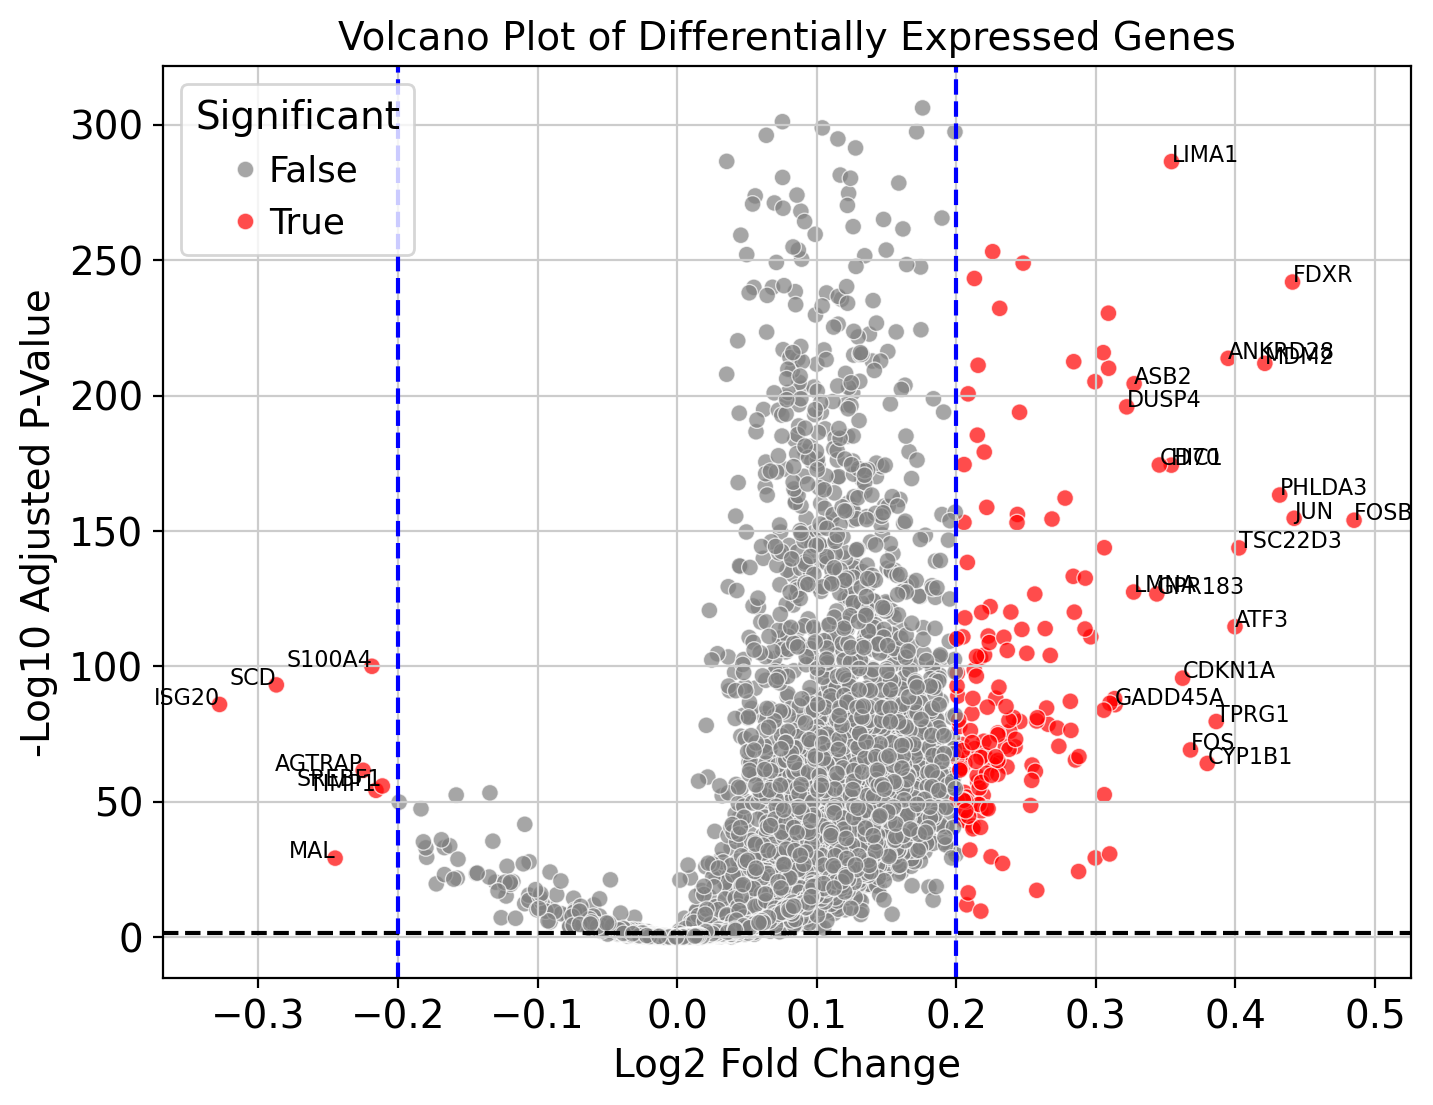

gene    log2FC  p_value  adjusted_p  -log10(adjusted_p)
1149    RPS27  0.087813      0.0         0.0                 inf
17867  MT-ND3  0.055280      0.0         0.0                 inf
15430   SNRPB  0.088830      0.0         0.0                 inf
602     UQCRH  0.086543      0.0         0.0                 inf
8738    PSMB7  0.190503      0.0         0.0                 inf
4689    RPL37  0.079097      0.0         0.0                 inf
3060    RPL32  0.057876      0.0         0.0                 inf
4813     BTF3  0.085148      0.0         0.0                 inf
8741    RPL35  0.065837      0.0         0.0                 inf
9095   RPL27A  0.114359      0.0         0.0                 inf
14253     UBB  0.125051      0.0         0.0                 inf
13182    RPS2  0.077176      0.0         0.0                 inf
3105    RPL15  0.081593      0.0         0.0                 inf
6113    RPS12  0.056055      0.0         0.0                 inf
7523    RPL39  0.070434      0.0         0.0                 inf
14506   RPL23  0.172707      0.0         0.0                 inf
5356    RACK1  0.067771      0.0         0.0                 inf
570      RPS8  0.062083      0.0         0.0                 inf
2102   RPS27A  0.066625      0.0         0.0                 inf
13375  RPS15A  0.064046      0.0         0.0                 inf
12094   RPS29  0.104504      0.0         0.0                 inf
10256   RPS24  0.069629      0.0         0.0                 inf
15796   PSMA7  0.078945      0.0         0.0                 inf
7401    RPS4X  0.073422      0.0         0.0                 inf
8059    RPL30  0.067060      0.0         0.0                 inf

In [53]:
# Compute -log10(adjusted p-value) for visualization
de_genes_df2["-log10(adjusted_p)"] = -np.log10(de_genes_df2["adjusted_p"])

# Identify significant genes (FDR < 0.05) and apply thresholds
significant_genes = de_genes_df2["adjusted_p"] < 0.01
upregulated = (de_genes_df2["log2FC"] > 0.20) & significant_genes
downregulated = (de_genes_df2["log2FC"] < -0.20) & significant_genes

# Sort genes by significance and select top 25
top_genes = de_genes_df2.sort_values(by="adjusted_p").head(25)

# Filter only upregulated genes (log2FC > 1)
upregulated_genes = de_genes_df2[de_genes_df2["log2FC"] > 0.20]
# Sort by adjusted p-value (FDR) in ascending order
top_upregulated_genes = upregulated_genes.sort_values(by="log2FC").tail(20)
# Display the top 20 upregulated genes
print("The top 20 genes that are upregulated:")
print(top_upregulated_genes)

# Filter only upregulated genes (log2FC > 1)
downregulated_genes = de_genes_df2[de_genes_df2["log2FC"] < -0.20]
# Sort by adjusted p-value (FDR) in ascending order
top_downregulated_genes = downregulated_genes.sort_values(by="log2FC").head(20)
# Display the top 20 upregulated genes
print("The top 20 genes that are downregulated:")
print(top_downregulated_genes)

volc_plot1 = plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=de_genes_df2, x="log2FC", y="-log10(adjusted_p)", 
    hue=upregulated+downregulated, palette={True: "red", False: "gray"}, alpha=0.7
)

# Add threshold lines
plt.axhline(-np.log10(0.05), linestyle="dashed", color="black")  # FDR threshold
plt.axvline(-0.20, linestyle="dashed", color="blue")  # Log2FC threshold (downregulated)
plt.axvline(0.20, linestyle="dashed", color="blue")  # Log2FC threshold (upregulated)

for _, row in top_upregulated_genes.iterrows():
    plt.text(row["log2FC"], row["-log10(adjusted_p)"], row["gene"], fontsize=8, ha="left", color="black")

# Label top 20 downregulated genes
for _, row in top_downregulated_genes.iterrows():
    plt.text(row["log2FC"], row["-log10(adjusted_p)"], row["gene"], fontsize=8, ha="right", color="black")

# Plot Formatting
plt.xlabel("Log2 Fold Change")
plt.ylabel("-Log10 Adjusted P-Value")
plt.title("Volcano Plot of Differentially Expressed Genes")
plt.legend(title="Significant")
plt.savefig("/labs/delitto/peter/Mooney_viscoelasticity_dataset/figures/volcano_3d_cc_vs_3d_nc.png", dpi=300, bbox_inches="tight")  # High-resolution PNG
plt.show()

print(top_genes)

de_genes_df2.to_csv("/labs/delitto/peter/Mooney_viscoelasticity_dataset/results/deseq2_results_3dcc_vs_3dnc_v2.csv", index = True)

In [59]:
gene_of_interest = "PDCD1"  # Replace with your gene name
log2fc_value = de_genes_df2.loc[de_genes_df2["gene"] == gene_of_interest, "log2FC"]
p_value = de_genes_df2.loc[de_genes_df2["gene"] == gene_of_interest, "adjusted_p"]
print('log2FC:',log2fc_value)
print('adjusted p-value:',p_value)


log2FC: 2989    0.007515
Name: log2FC, dtype: float32

adjusted p-value: 2989    1.0
Name: adjusted_p, dtype: float64

19

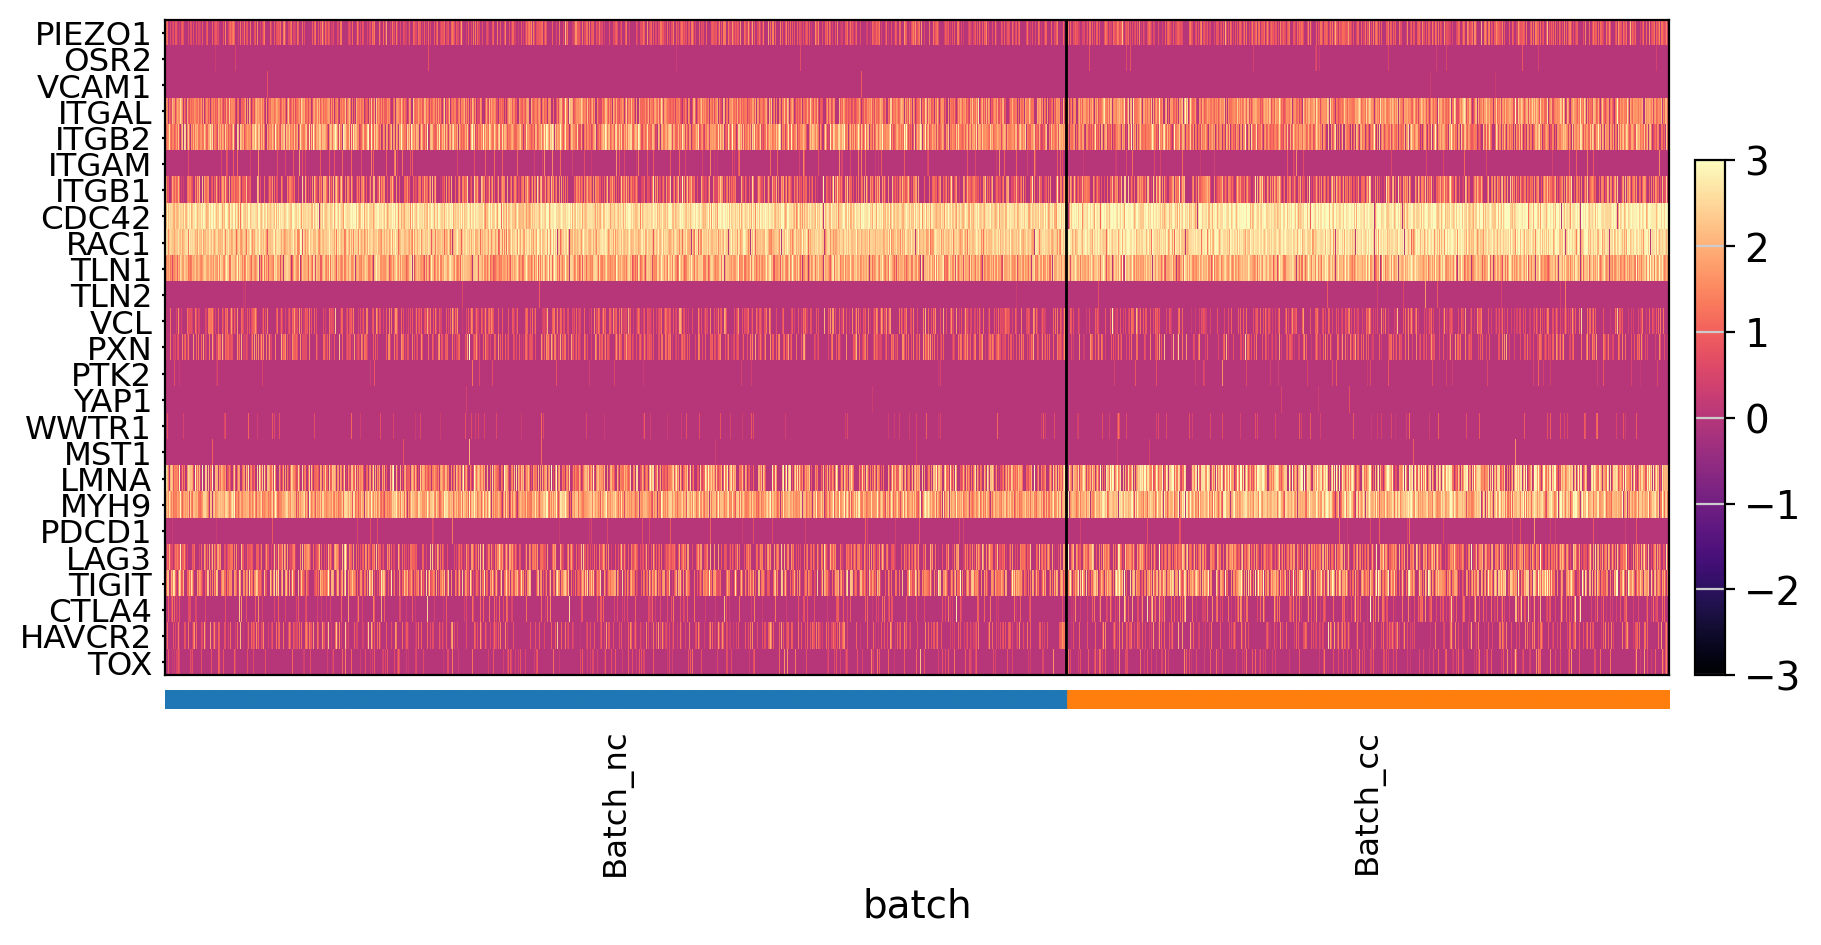

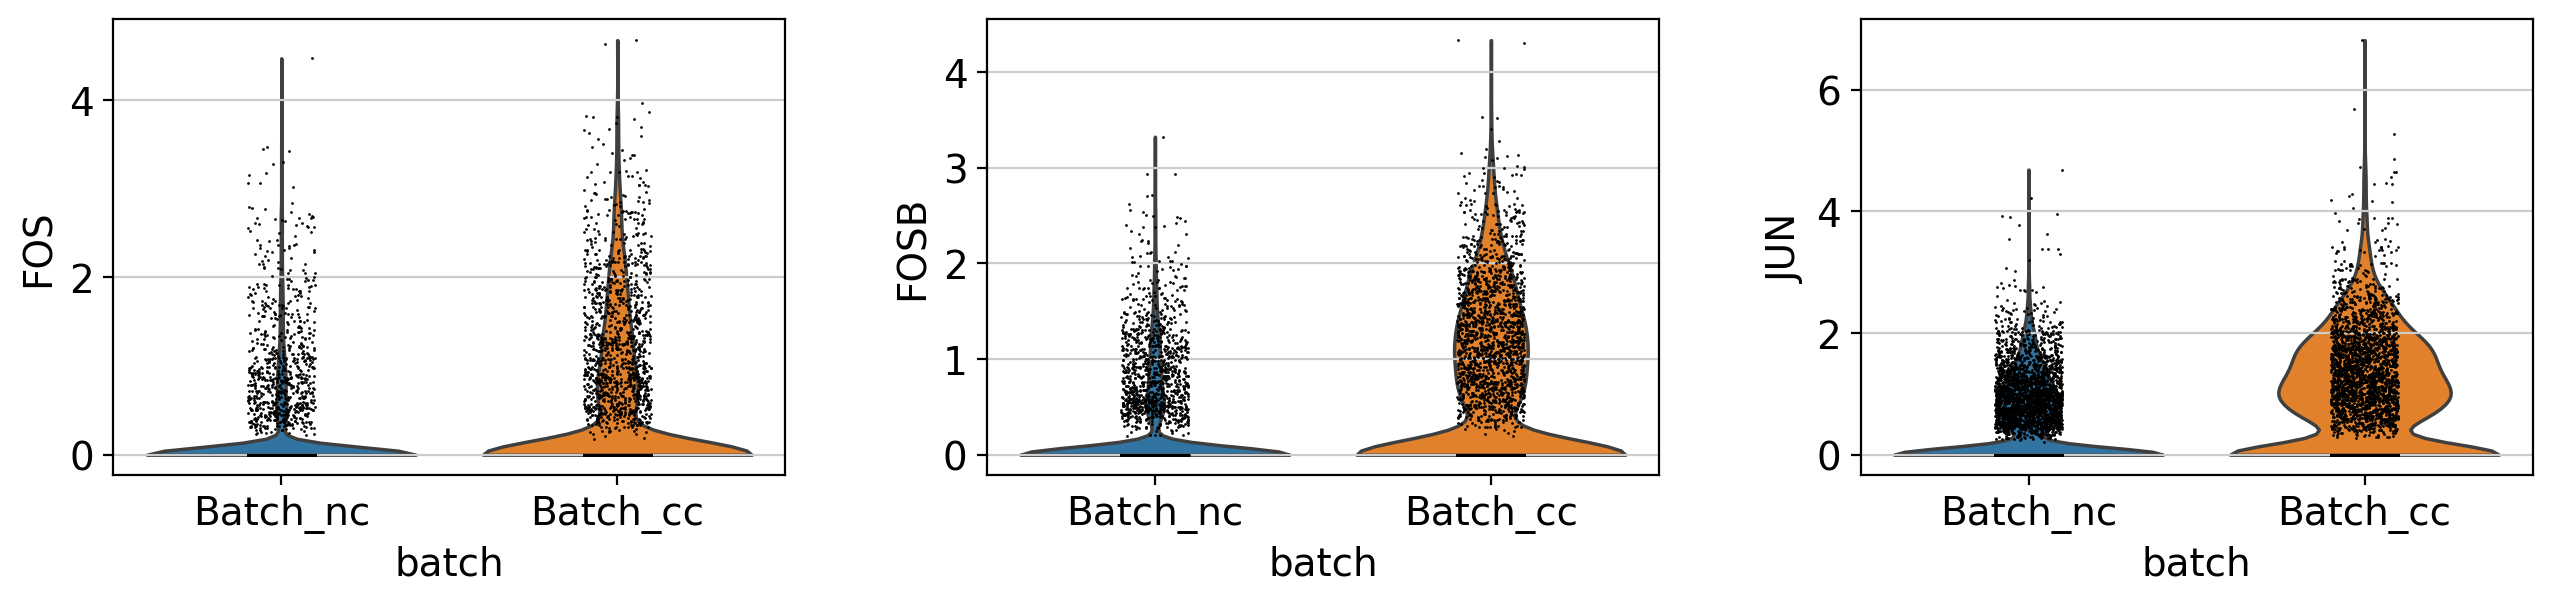

In [70]:
exhaustion_genes = [
    "PDCD1", "LAG3", "TIGIT", "CTLA4", "HAVCR2", "TOX", 
]
cytokine_genes = ['IL2', 'GZMA', 'GNLY', 'PRF1', 'GZMB', 'GZMK', 'IFNG','TNF', 'NKG7']

mech_genes = [
    "PIEZO1", "ITGA", "OSR2", "SCD4", "VCAM1", "ITGAL", "ITGB2", "ITGAM", "ITGB1", "CDC42", "RAC1", "TLN1", "TLN2", "VCL", "PXN", "PTK2", "YAP1", 
    "WWTR1", "MST1", "TRPV4", "LMNA", "NES", "MYH9"
]
mech_genes_in_data = [x for x in mech_genes if x in subset_tcelladata.var_names]
print(len(mech_genes_in_data))
batches_to_keep = ["Batch_cc", "Batch_nc"]  # Replace with the actual batch names
subset_tcelladata = adata_sub[adata_sub.obs["batch"].isin(batches_to_keep)].copy()
sc.pl.heatmap(
    subset_tcelladata, 
    var_names=mech_genes_in_data+exhaustion_genes,   # List of top marker genes
    groupby="batch", # Group by cancer types
    cmap="magma",        # Change color scale if needed
    swap_axes=True,        # Display genes on Y-axis
    show=True,
    show_gene_labels = True,
    vmin=-3, vmax=3,  # Adjust for better contrast
    save = 'visco_Heatmap_plot_mechanotransduction_genes.png'
)

with rc_context({"figure.figsize": (4.5, 3)}):
    sc.pl.violin(subset_tcelladata, ["FOS", "FOSB", "JUN"], groupby="batch")

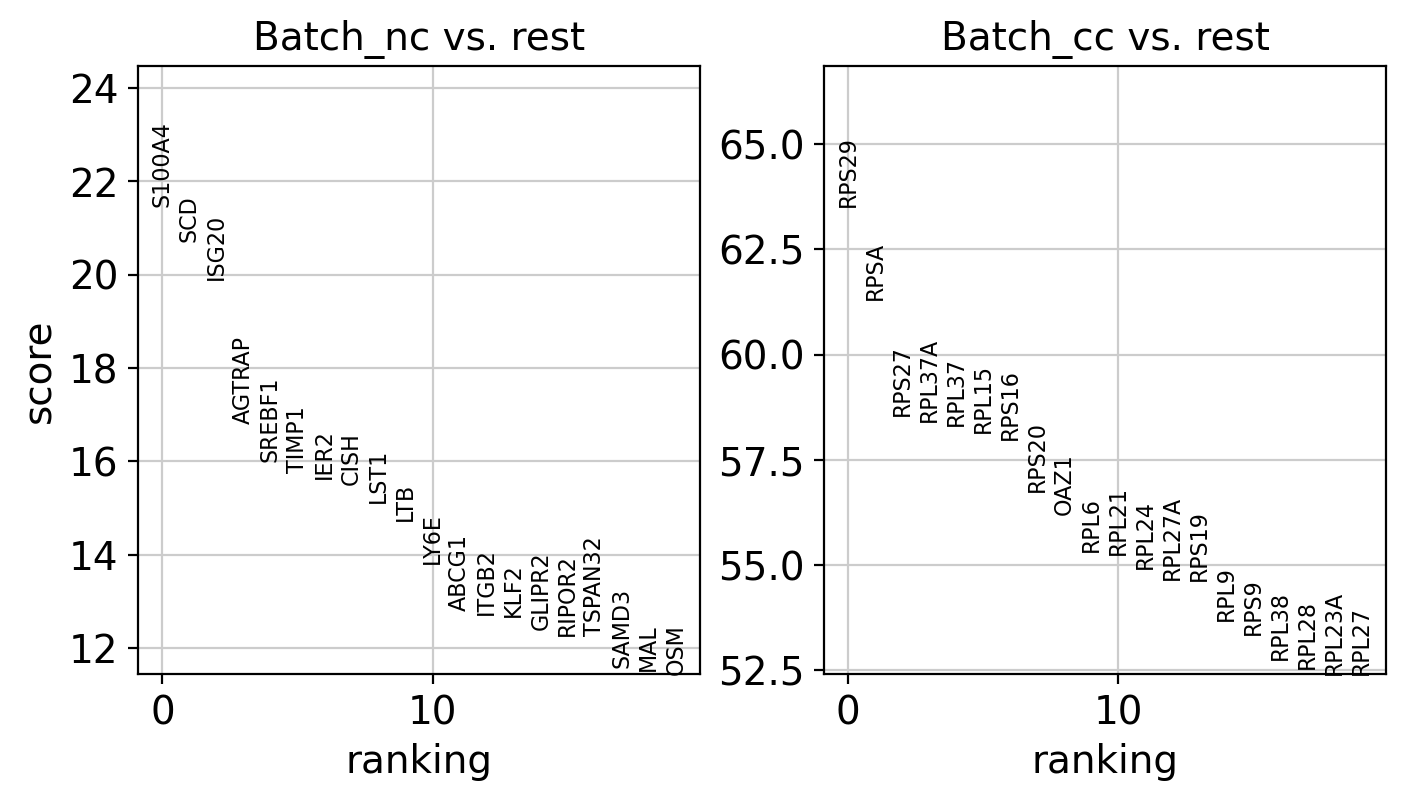

In [48]:
batches_to_keep = ["Batch_cc", "Batch_nc"]  # Replace with the actual batch names
subset_tcelladata = adata_sub[adata_sub.obs["batch"].isin(batches_to_keep)].copy()

sc.tl.rank_genes_groups(subset_tcelladata, groupby="batch", method="wilcoxon")
sc.pl.rank_genes_groups(subset_tcelladata, n_genes=20, sharey=False)


In [49]:
groups = subset_tcelladata.uns["rank_genes_groups"]["names"].dtype.names 
top_genes_df_1 = sc.get.rank_genes_groups_df(subset_tcelladata, group = groups[0]).head(200)
top_genes_df_2 = sc.get.rank_genes_groups_df(subset_tcelladata, group = groups[1]).head(200)
# # Combine into one DataFrame
df_all = pd.concat([top_genes_df_1, top_genes_df_2], keys=groups)
print(df_all.head())
print(df_all.shape)


names     scores  logfoldchanges          pvals      pvals_adj
Batch_nc 0  S100A4  21.455820        0.966513  4.029481e-102  1.058079e-100
         1     SCD  20.704147        1.126583   3.178116e-95   7.659173e-94
         2   ISG20  19.880955        1.118219   5.949023e-88   1.303682e-86
         3  AGTRAP  16.813097        0.767193   1.956787e-63   2.774883e-62
         4  SREBF1  15.996706        1.051093   1.347165e-57   1.692902e-56

(400, 5)

In [ ]:
# Extract top genes as a list
top_genes_df = pd.DataFrame(df_all, columns=["names", "scores", "logfoldchanges", "pvals", "pvals_adj"])  # Adjust columns
top_genes_list = top_genes_df["names"]  # Convert column to a list
print(top_genes_list[:10])  # Verify the output
df_unique = top_genes_list.drop_duplicates()
print(df_unique)
geo_gene_list_mechanotransduction = [
    "ABHD12", "ACTA1", "ADGRV1", "ANGPT2", "ANKRD1", "ANKRD23", "ANO3", "AQP1", "ASIC2", "ASIC3",
    "ATAT1", "ATOH7", "ATP1A2", "ATP8A2", "ATR", "BACE1", "BAD", "BAG3", "BAK1", "BCL10",
    "BDKRB1", "BGLAP", "BMP6", "BNIP3", "BTG2", "CALB1", "CAPN2", "CASP1", "CASP2", "CASP5",
    "CASP8", "CASP8AP2", "CAV3", "CD40", "CDH2", "CHEK1", "CHI3L1", "CHRNA10", "CHRNA9", "CITED2",
    "CLCN6", "CNN2", "CNTNAP2", "COL11A1", "COL1A1", "COL6A1", "CRADD", "CSRP3", "CTNNB1", "CXCL10",
    "CXCL12", "CXCR4", "DAG1", "DCANP1", "DDR2", "DMD", "DRD2", "EDN1", "EGFR", "ENG",
    "ETV1", "F11R", "FADD", "FAS", "FGF2", "FOS", "FOSB", "FOSL1", "FYN", "GADD45A",
    "GAP43", "GATA4", "GCLC", "GDF5", "GPI", "GSN", "HABP4", "HPN", "HTR2A", "HTT",
    "IGF1R", "IGFBP2", "IHH", "IL13", "IL1B", "IL33", "IRF1", "ITGA2", "ITGAM", "ITGB3",
    "JUP", "KCNA1", "KCNA5", "KCNC1", "KCNJ2", "KCNK2", "KCNK4", "KCNQ1", "KCNQ3", "KIAA0319",
    "KIT", "KRT5", "LARGE1", "LHFPL5", "LRP11", "LTBR", "MAG", "MAP1B", "MAP2K4", "MAP3K1",
    "MAP3K14", "MAP3K2", "MAPK14", "MAPK3", "MAPK8", "MBD2", "MDK", "MEIS2", "MKKS", "MMP14",
    "MMP2", "MPO", "MYD88", "NEUROG1", "NFKB1", "NFKBIA", "NPPA", "NRXN1", "NRXN2",
    "NTRK1", "P2RX3", "P2RX7", "P2RY1", "PDE2A", "PDZD7", "PHF24", "PIEZO1", "PIEZO2", "PIK3CA",
    "PJVK", "PKD1", "PKD1L1", "PKD1L2", "PKD1L3", "PKD2", "PKD2L1", "PKD2L2", "PKDREJ", "PLEC",
    "POSTN", "PPL", "PSPH", "PTCH1", "PTGER4", "PTGS2", "PTK2", "PTK2B", "PTN", "RAF1",
    "RELA", "RETN", "RPS6KB1", "RYR2", "SCEL", "SCN11A", "SCN1A", "SCN9A", "SCX", "SERPINE2",
    "SHANK3", "SLC1A3", "SLC26A5", "SLC2A1", "SLC38A2", "SLC8A1", "SLC9A1", "SLITRK6", "SOST", "SOX9",
    "SRC", "STAT1", "STRA6", "STRBP", "STRC", "SUN1", "TACR1", "TCAP", "TGFB1", "THBS1",
    "TIFAB", "TLR3", "TLR4", "TLR5", "TLR7", "TLR8", "TMC1", "TMC2", "TMEM120A", "TMEM150C",
    "TMEM87A", "TNC", "TNF", "TNFRSF10A", "TNFRSF10B", "TNFRSF11A", "TNFRSF1A", "TNFRSF8", "TNFSF14", "TRPA1",
    "TRPV4", "TTN", "TUBA1A", "TXNIP", "UCN", "USP53", "WHRN", "WNT11", "XPA", "XPC", "VCAM1"]

exhaustion_genes = [
    "PDCD1", "LAG3", "TIGIT", "CTLA4", "HAVCR2", "TOX", 
]
cytokine_genes = ['IL2', 'GZMA', 'GNLY', 'PRF1', 'GZMB', 'GZMK', 'IFNG','TNF', 'NKG7']

mech_genes = [
    "PIEZO1", "ITGA", "OSR2", "SCD4", "VCAM1", "ITGAL", "ITGB2", "ITGAM", "ITGB1", "CDC42", "RAC1", "TLN1", "TLN2", "VCL", "PXN", "PTK2", "YAP1", 
    "WWTR1", "MST1", "TRPV4", "LMNA", "NES", "MYH9"
]
mech_genes_in_data = [x for x in mech_genes if x in subset_tcelladata.var_names]
print(len(mech_genes_in_data))
# Find overlapping genes
overlapping_genes = set(df_unique).intersection(set(geo_gene_list_mechanotransduction))
overlapping_genes = list(overlapping_genes)
print("Overlapping Genes:", overlapping_genes)
# desired_order = ["Blood", "Adjacent", "Tumor"]  # Replace with your batch categories in the desired order
# subset_tcelladata.obs["batch"] = pd.Categorical(
#     subset_tcelladata.obs["batch"], categories=desired_order, ordered=True
# )

sc.pl.heatmap(
    subset_tcelladata, 
    var_names=df_unique,   # List of top marker genes
    groupby="batch", # Group by cancer types
    cmap="magma",        # Change color scale if needed
    swap_axes=True,        # Display genes on Y-axis
    show=True,
    show_gene_labels = True,
    vmin=-2.5, vmax=2.5,  # Adjust for better contrast
    save = 'tumor_location_Heatmap_plot_mechanotransduction_genes.png'
)

87

202

20

57

6

10

0        -0.057270
1        -0.096797
2        -0.045757
3        -0.063141
4        -0.157123
            ...   
4127-1   -0.163960
4128-1   -0.084104
4129     -0.058406
4130-1   -0.111136
4131-1   -0.134173
Name: integrin_gene_scores, Length: 7938, dtype: float64

0        -0.142686
1         0.062048
2         0.136811
3        -0.004460
4        -0.347365
            ...   
4127-1    0.259922
4128-1    0.273502
4129      0.148922
4130-1    0.022030
4131-1   -0.020272
Name: exhaustion_gene_scores, Length: 7938, dtype: float64

0        -0.080775
1        -0.014206
2         0.085891
3        -0.185652
4         0.056862
            ...   
4127-1   -0.193500
4128-1   -0.160054
4129      0.251348
4130-1   -0.156417
4131-1   -0.146405
Name: mechionchannels_gene_scores, Length: 7938, dtype: float64

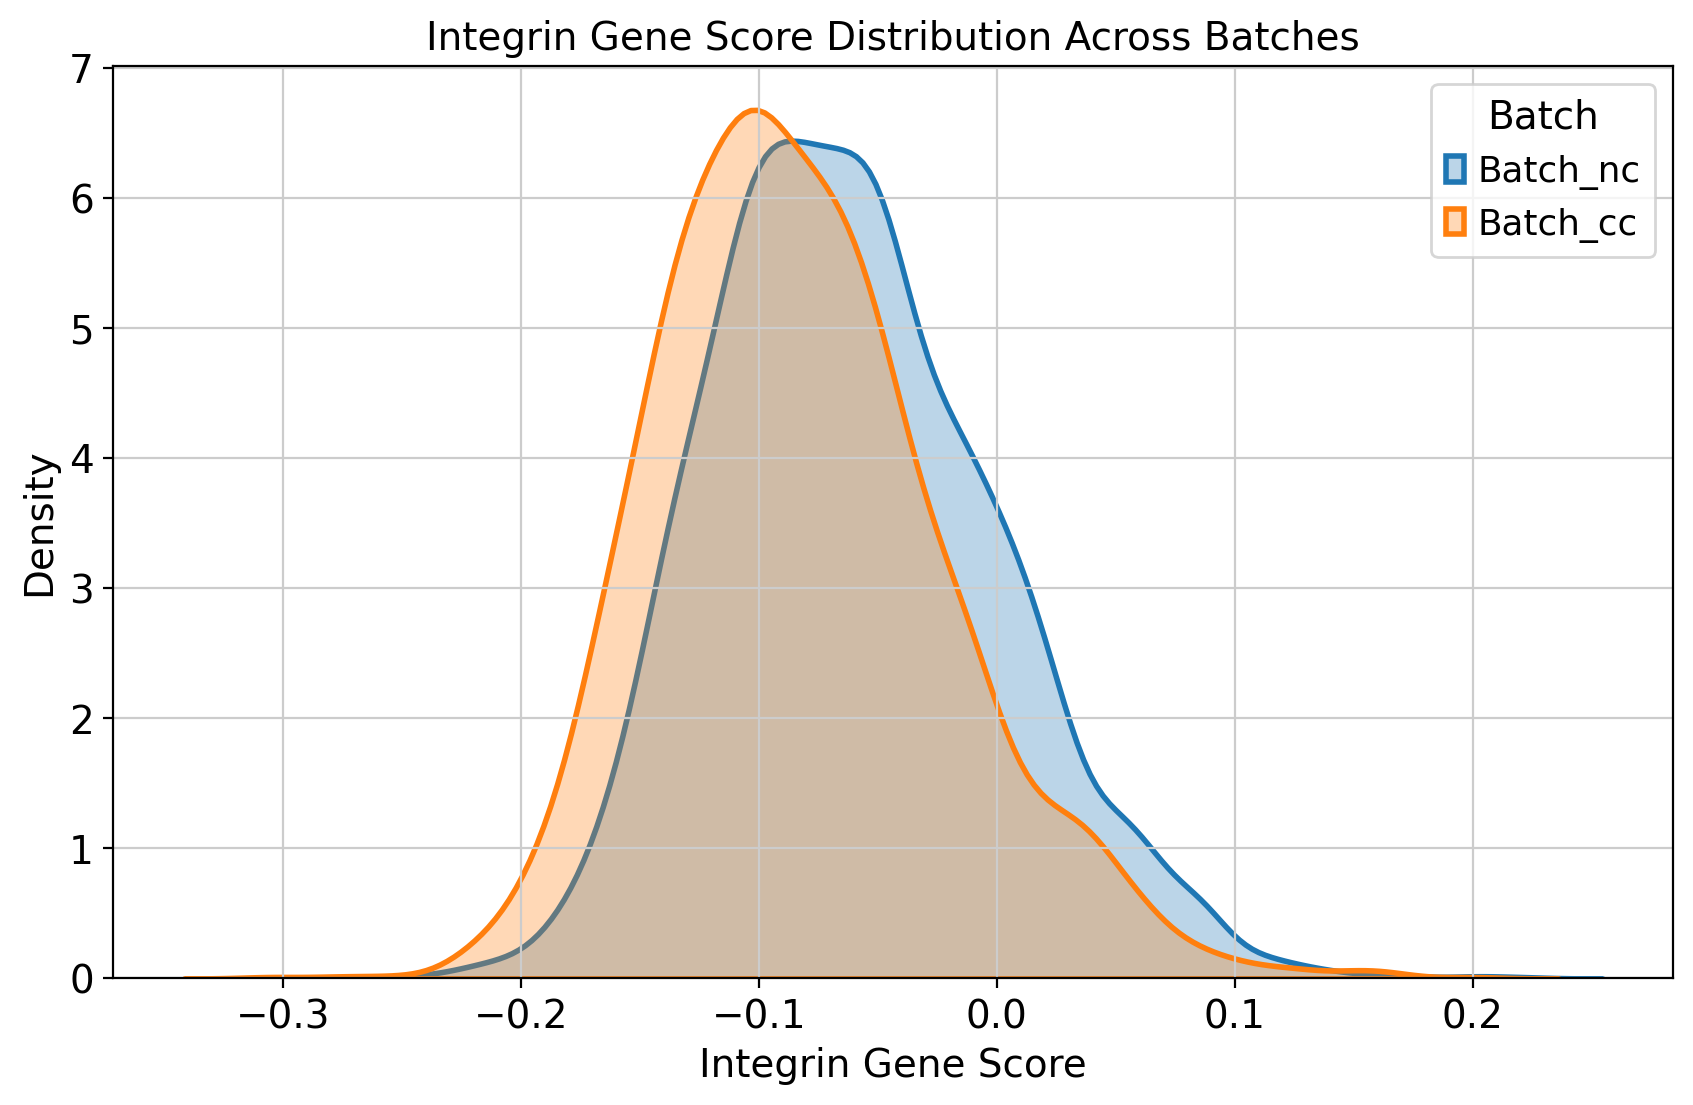

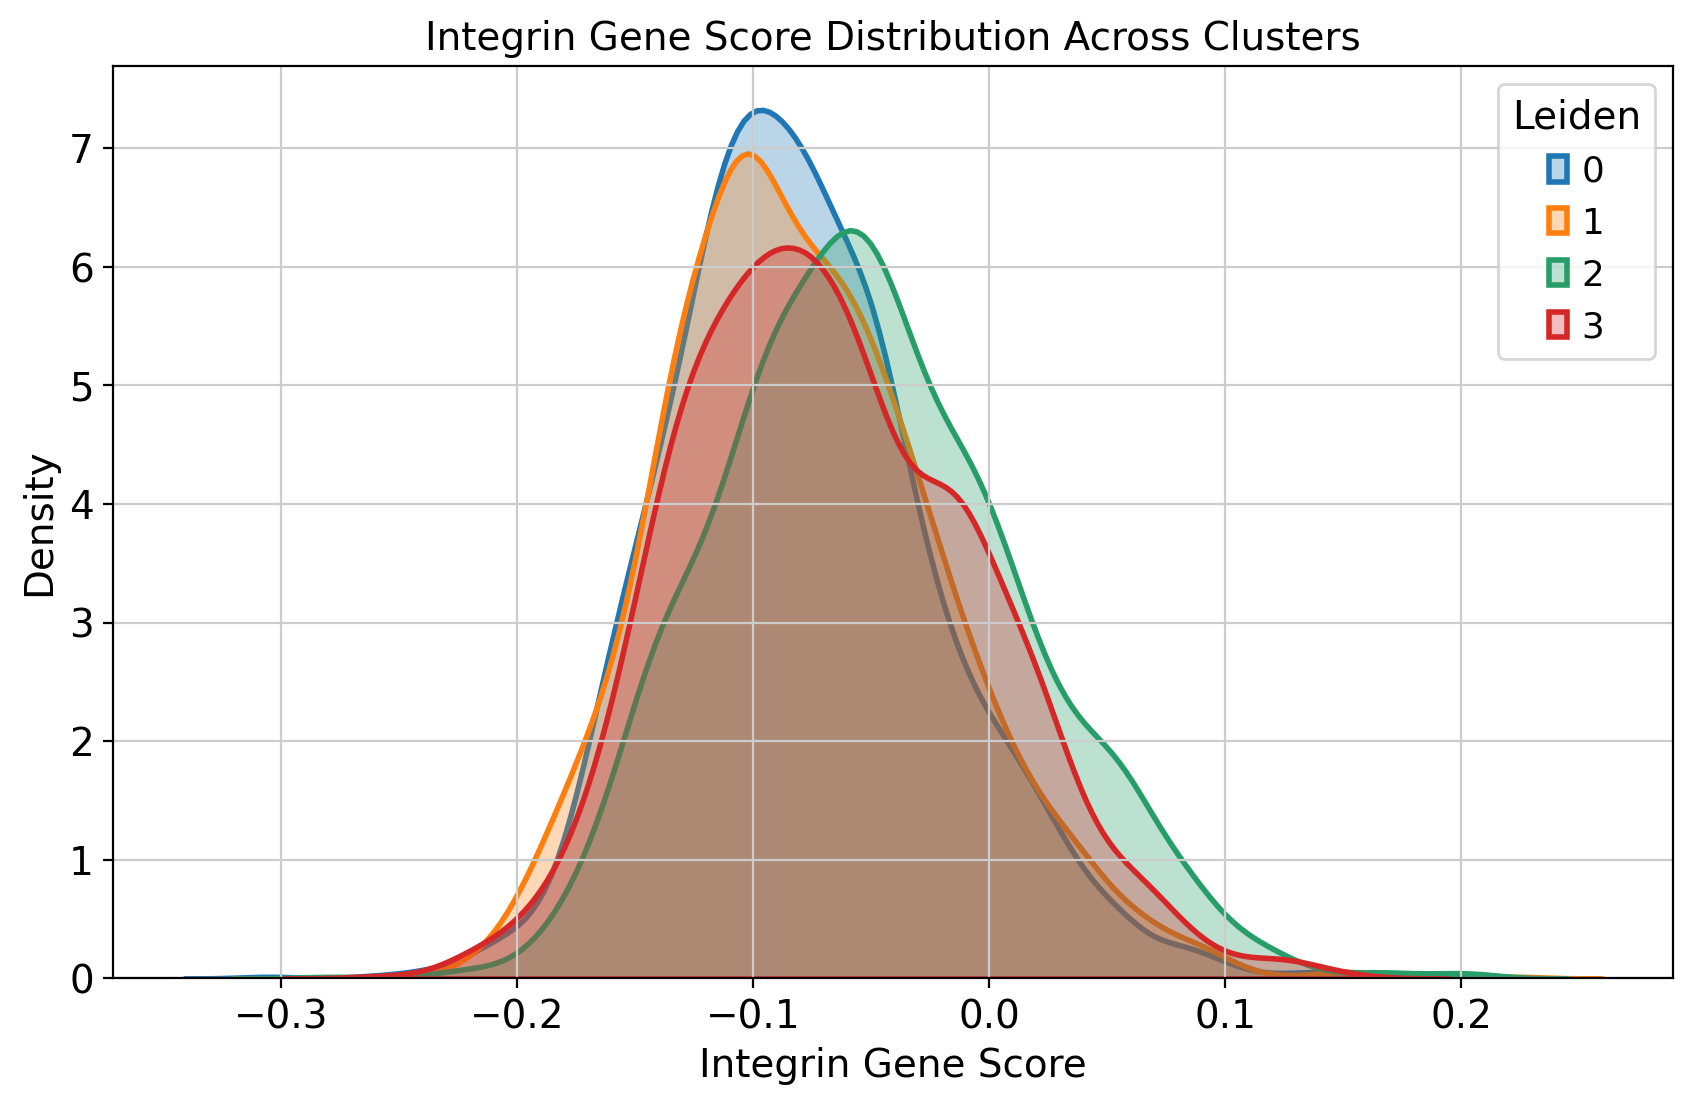

/local/scratch/pyxie/slrmtmp.47760608/ipykernel_6159/4027486095.py:51: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  subset = subset_tcelladata.obs[adata_sub.obs['batch'] == batch]
/local/scratch/pyxie/slrmtmp.47760608/ipykernel_6159/4027486095.py:51: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  subset = subset_tcelladata.obs[adata_sub.obs['batch'] == batch]


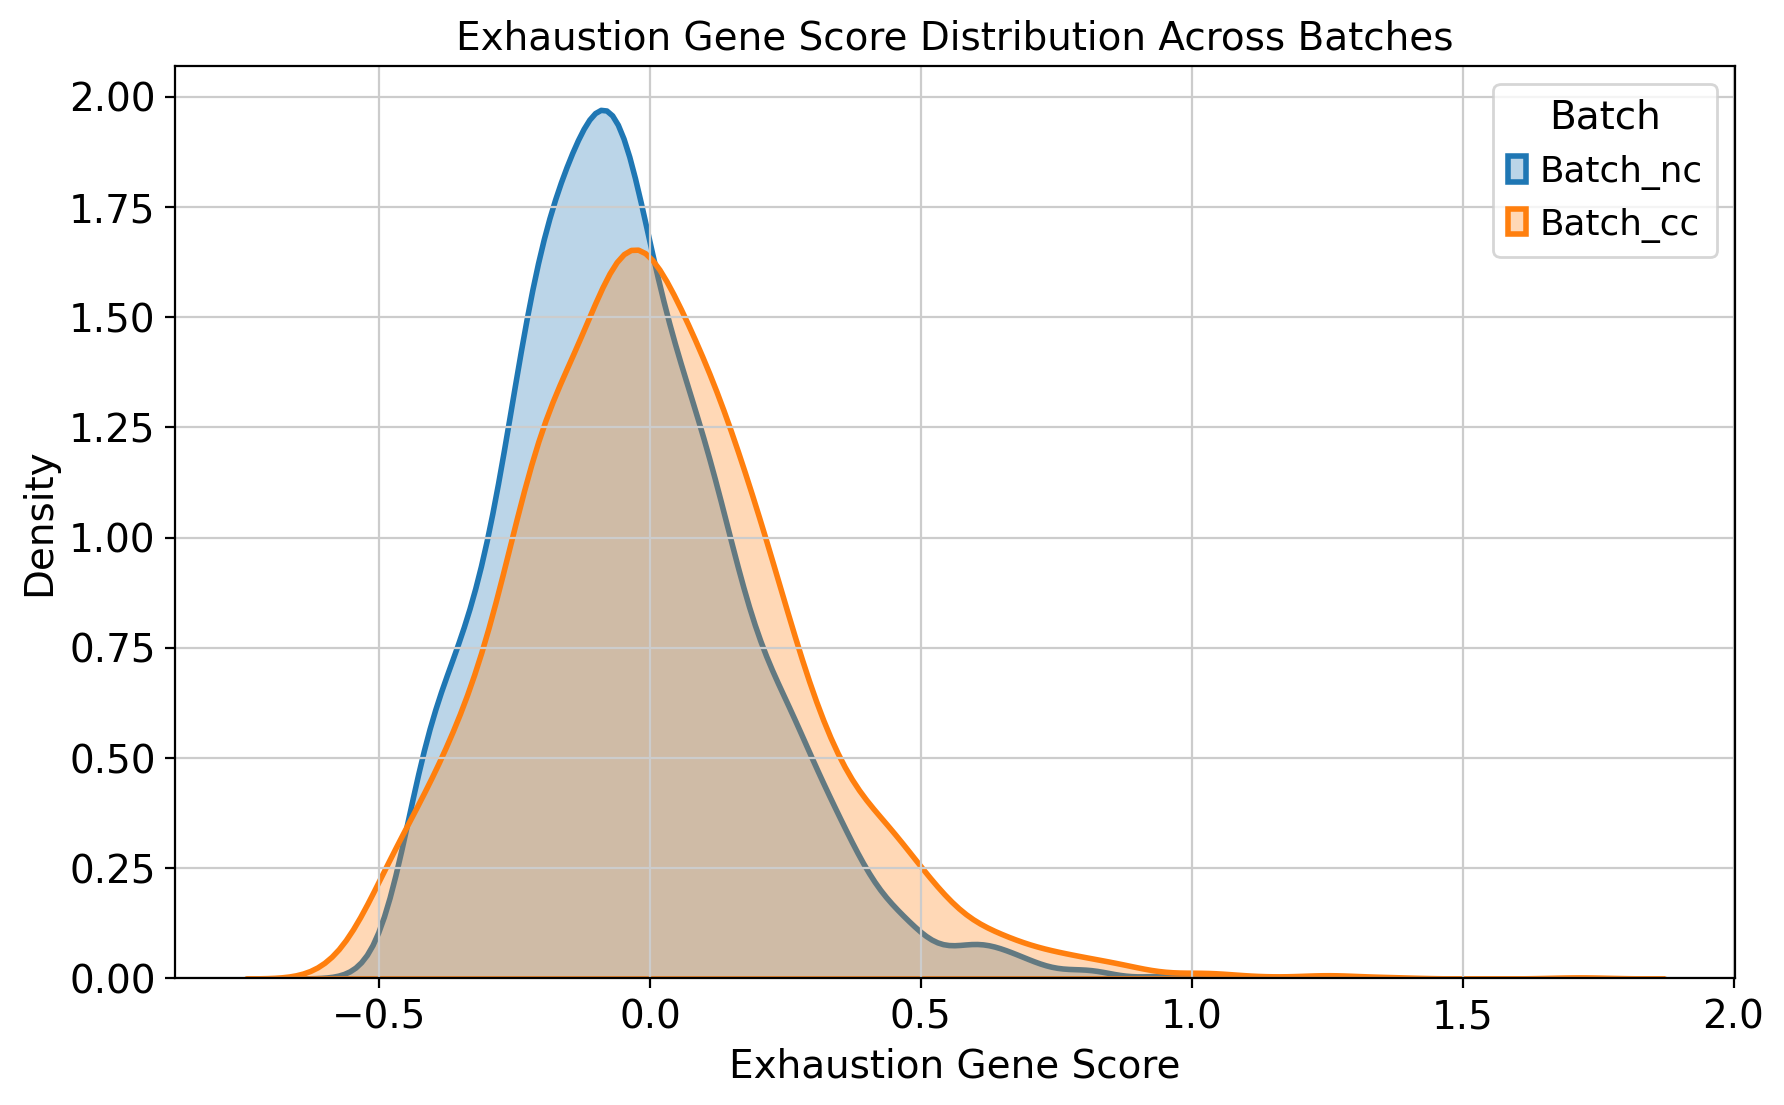

/local/scratch/pyxie/slrmtmp.47760608/ipykernel_6159/4027486095.py:62: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  subset = subset_tcelladata.obs[adata_sub.obs['batch'] == batch]
/local/scratch/pyxie/slrmtmp.47760608/ipykernel_6159/4027486095.py:62: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  subset = subset_tcelladata.obs[adata_sub.obs['batch'] == batch]


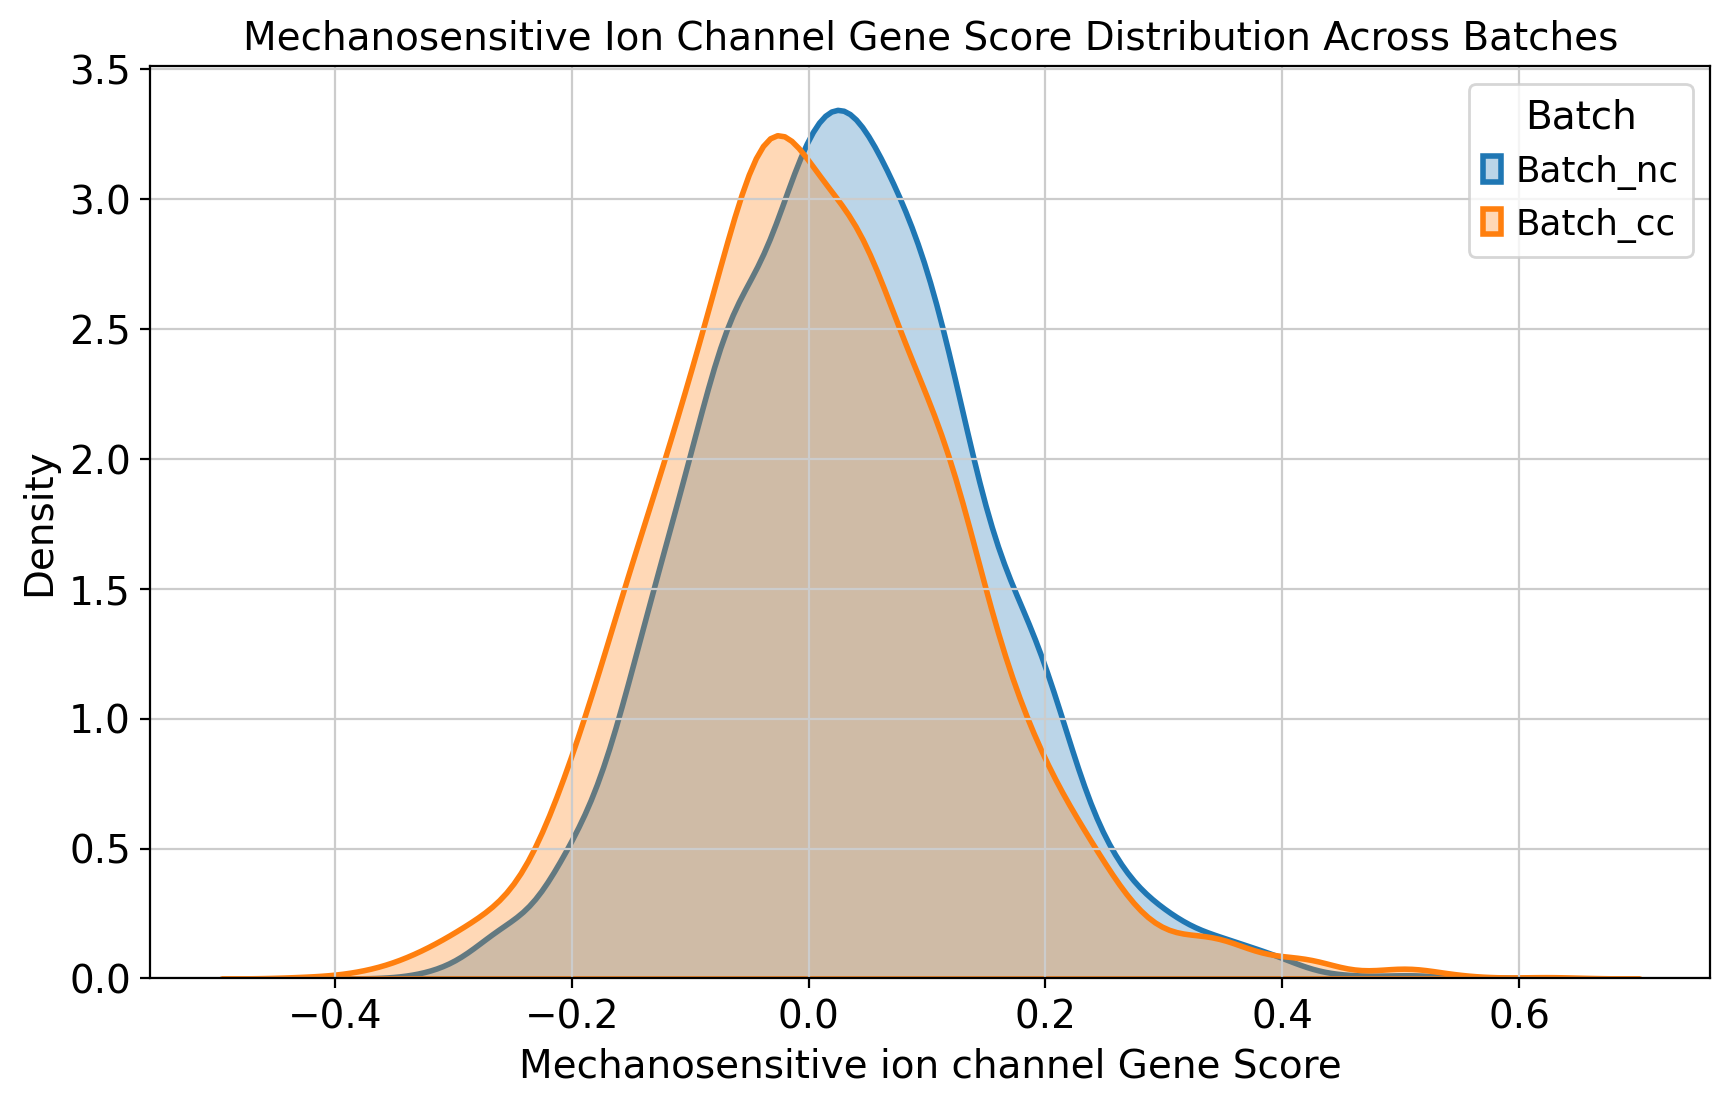

In [76]:
    
integrin_genes = [x.strip() for x in open('/labs/delitto/peter/Mooney_viscoelasticity_dataset/data/REACTOME_INTEGRIN_CELL_SURFACE_INTERACTIONS.txt')]
print(len(integrin_genes))

exhaustion_genes = [x.strip() for x in open('/labs/delitto/peter/Mooney_viscoelasticity_dataset/data/GSE9650_EFFECTOR_VS_EXHAUSTED_CD8_TCELL_DN.v2024.1.txt')]
print(len(exhaustion_genes))
exhaustion_genes = [
    "PDCD1", "LAG3", "TIGIT", "CTLA4", "HAVCR2", "TOX"
]
mechionchannels_genes = [x.strip() for x in open('/labs/delitto/peter/Mooney_viscoelasticity_dataset/data/GOMF_MECHANOSENSITIVE_MONOATOMIC_ION_CHANNEL_ACTIVITY.v2024.1.txt')]
print(len(mechionchannels_genes))

integrin_genes_in_data = [x for x in integrin_genes if x in subset_tcelladata.var_names]
print(len(integrin_genes_in_data))
integrin_gene_scores = 'integrin_gene_scores'
exhaustion_genes_in_data = [x for x in exhaustion_genes if x in subset_tcelladata.var_names]
print(len(exhaustion_genes_in_data))
exhaustion_gene_scores = 'exhaustion_gene_scores'
mechionchannels_genes_in_data = [x for x in mechionchannels_genes if x in subset_tcelladata.var_names]
print(len(mechionchannels_genes_in_data))
mechionchannels_gene_scores = 'mechionchannels_gene_scores'

sc.tl.score_genes(subset_tcelladata, gene_list=integrin_genes_in_data, score_name=integrin_gene_scores)
print(subset_tcelladata.obs[integrin_gene_scores])
sc.tl.score_genes(subset_tcelladata, gene_list=exhaustion_genes_in_data, score_name=exhaustion_gene_scores)
print(subset_tcelladata.obs[exhaustion_gene_scores])
sc.tl.score_genes(subset_tcelladata, gene_list=mechionchannels_genes_in_data, score_name=mechionchannels_gene_scores)
print(subset_tcelladata.obs[mechionchannels_gene_scores])

plt.figure(figsize=(10, 6))
for batch in subset_tcelladata.obs['batch'].unique():
    subset = subset_tcelladata.obs[subset_tcelladata.obs['batch'] == batch]
    sns.kdeplot(subset[integrin_gene_scores], label=batch, fill=True, alpha=0.3, linewidth=2)
plt.title("Integrin Gene Score Distribution Across Batches")
plt.xlabel("Integrin Gene Score")
plt.ylabel("Density")
plt.legend(title="Batch")
plt.show()

plt.figure(figsize=(10, 6))
for leiden in subset_tcelladata.obs["leiden_res_0.40"].unique():
    subset = subset_tcelladata.obs[subset_tcelladata.obs["leiden_res_0.40"] == leiden]
    sns.kdeplot(subset[integrin_gene_scores], label=leiden, fill=True, alpha=0.3, linewidth=2)
plt.title("Integrin Gene Score Distribution Across Clusters")
plt.xlabel("Integrin Gene Score")
plt.ylabel("Density")
plt.legend(title="Leiden")
plt.show()

plt.figure(figsize=(10, 6))
for batch in subset_tcelladata.obs['batch'].unique():
    subset = subset_tcelladata.obs[adata_sub.obs['batch'] == batch]
    sns.kdeplot(subset[exhaustion_gene_scores], label=batch, fill=True, alpha=0.3, linewidth=2)
plt.title("Exhaustion Gene Score Distribution Across Batches")
plt.xlabel("Exhaustion Gene Score")
plt.ylabel("Density")
plt.legend(title="Batch")
plt.show()


plt.figure(figsize=(10, 6))
for batch in subset_tcelladata.obs['batch'].unique():
    subset = subset_tcelladata.obs[adata_sub.obs['batch'] == batch]
    sns.kdeplot(subset[mechionchannels_gene_scores], label=batch, fill=True, alpha=0.3, linewidth=2)
plt.title("Mechanosensitive Ion Channel Gene Score Distribution Across Batches")
plt.xlabel("Mechanosensitive ion channel Gene Score")
plt.ylabel("Density")
plt.legend(title="Batch")
plt.show()



/local/scratch/pyxie/slrmtmp.47760608/ipykernel_6159/1860703081.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


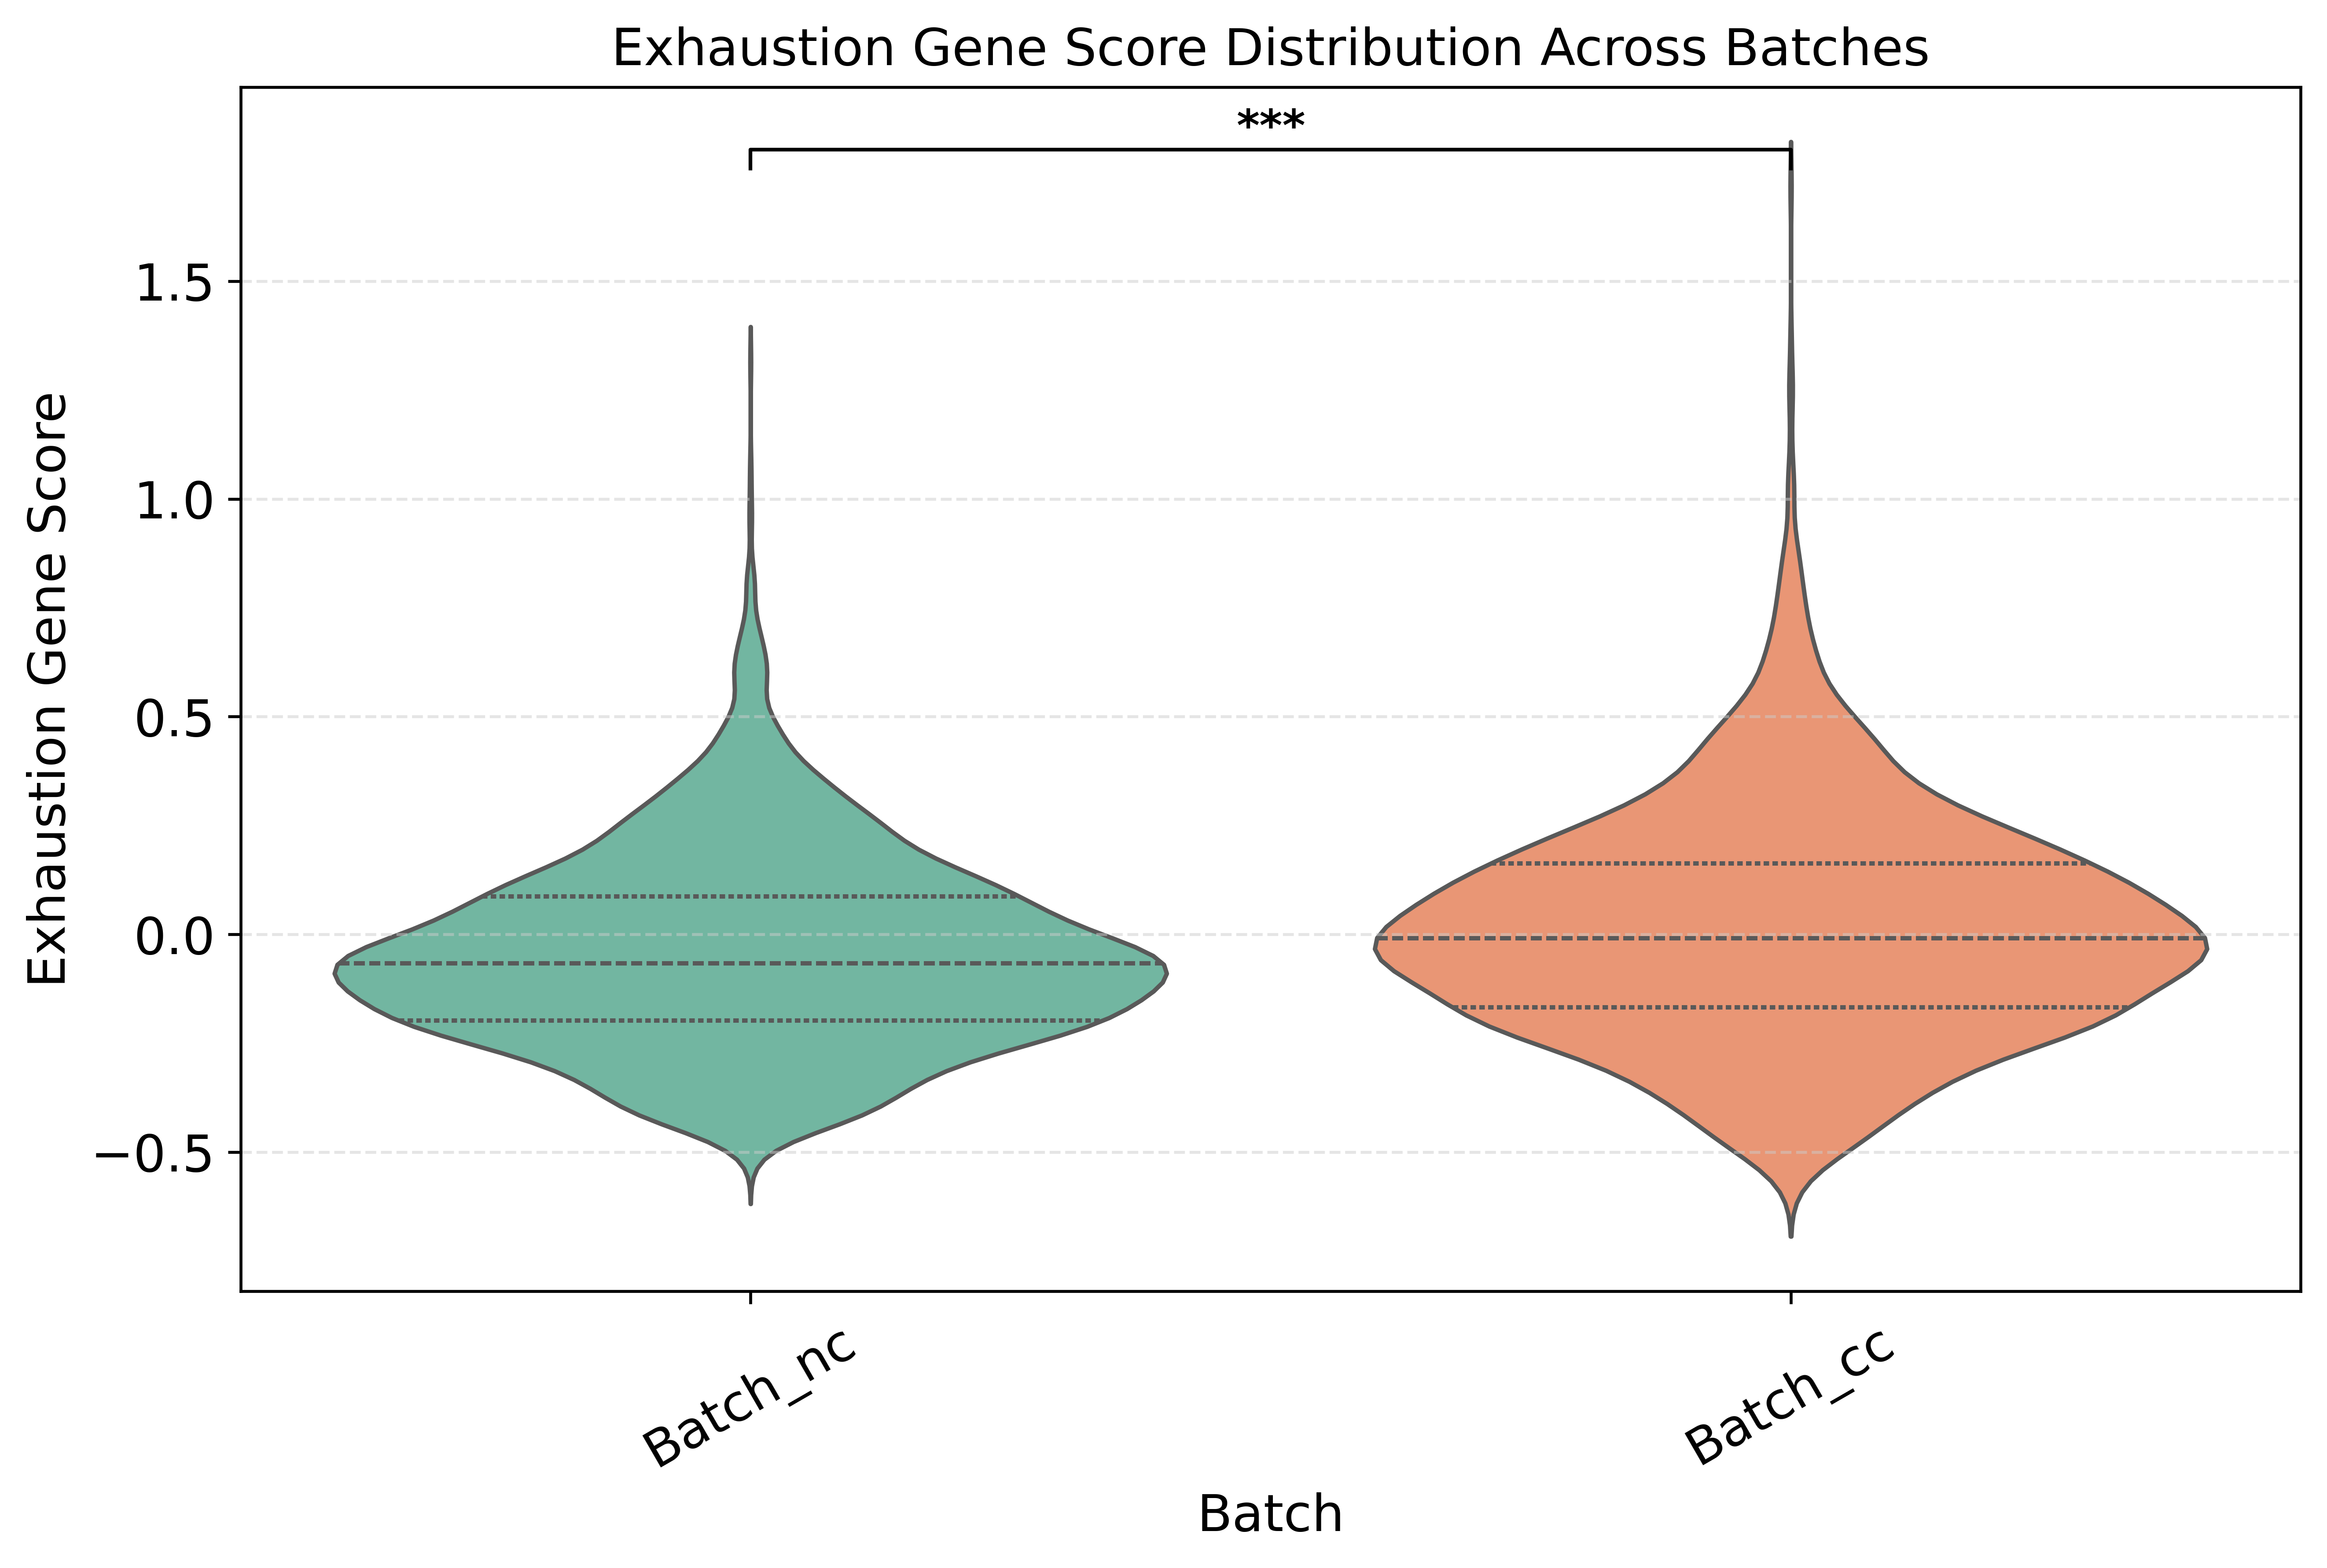

p-value
Batch_nc vs Batch_cc  1.640537e-22

In [78]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import ttest_ind

# Define the sample type order
sample_order = subset_tcelladata.obs["batch"].unique()

# Create the violin plot
plt.figure(figsize=(10, 6), dpi=300)
sns.violinplot(
    data=subset_tcelladata.obs,
    x="batch",  # Batches on x-axis
    y=exhaustion_gene_scores,  # Exhaustion scores on y-axis
    inner="quartile",  # Show quartiles inside violins
    palette="Set2",  # Use a color palette for distinction
    linewidth=1.2
)

# Perform pairwise t-tests
p_values = {}
for i in range(len(sample_order)):
    for j in range(i + 1, len(sample_order)):
        group1 = subset_tcelladata.obs.loc[subset_tcelladata.obs["batch"] == sample_order[i], exhaustion_gene_scores]
        group2 = subset_tcelladata.obs.loc[subset_tcelladata.obs["batch"] == sample_order[j], exhaustion_gene_scores]
        t_stat, p_val = ttest_ind(group1.dropna(), group2.dropna(), equal_var=False)  # Welch’s t-test
        p_values[f"{sample_order[i]} vs {sample_order[j]}"] = p_val

# Function to convert p-values into significance stars
def get_pval_annotation(pval):
    if pval < 0.001:
        return "***"
    elif pval < 0.01:
        return "**"
    elif pval < 0.05:
        return "*"
    else:
        return "ns"  # Not significant

# Manually Add Significance Bars
y_max = subset_tcelladata.obs[exhaustion_gene_scores].max()  # Get highest exhaustion score for plotting
y_step = y_max * 0.05  # Adjust spacing between significance bars

pairs = [(sample_order[i], sample_order[j]) for i in range(len(sample_order)) for j in range(i + 1, len(sample_order))]
x_positions = {name: i for i, name in enumerate(sample_order)}

for i, (group1, group2) in enumerate(pairs):
    p_val = p_values[f"{group1} vs {group2}"]
    sig_label = get_pval_annotation(p_val)

    x1, x2 = x_positions[group1], x_positions[group2]
    y = y_max + (i + 1) * y_step  # Adjust y position for each pair

    plt.plot([x1, x1, x2, x2], [y - y_step / 2, y, y, y - y_step / 2], color="black", linewidth=1)
    plt.text((x1 + x2) / 2, y, sig_label, ha="center", va="bottom", fontsize=12, fontweight="bold")

# Rotate x-axis labels
plt.xlabel("Batch")
plt.ylabel("Exhaustion Gene Score")
plt.title("Exhaustion Gene Score Distribution Across Batches")
plt.xticks(rotation=30)
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.savefig("/home/pyxie/Single_cell_pan_tcell_analysis/figures/viscoelasticity_exhaustion.png", dpi=300, bbox_inches="tight")
plt.show()

# Display Pairwise T-test Results
p_values_df = pd.DataFrame.from_dict(p_values, orient="index", columns=["p-value"])
print(p_values_df)